<a href="https://colab.research.google.com/github/mariaviter/Sales-Analytics-visitors-behaviour-/blob/main/Analysis_of_the_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Датасет
Наступний датасет міститься інформація щодо продажів продукції компанії, яка працює на світовому ринку і продає товари у звичайних магазинах та інтернет-магазинах. Датасет складається з трьох таблиць:

events.csv — продажі за декілька років;
products.csv — категорії товарів та їх коди;
countries.csv — країни, регіони та їх коди.

##Основна мета:
очищення даних та проведення їх аналізу; знаходження цінних інсайтів діяльності компанії.



###Підключаємо датасет.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/practic/'
countries_df = pd.read_csv(path + 'countries.csv')
events_df = pd.read_csv(path + 'events.csv')
products_df = pd.read_csv(path + 'products.csv')

print(countries_df.head())
print("-----------------------------")

print(events_df.head())
print("-----------------------------")

print(products_df)
print("-----------------------------")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
             name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia
-----------------------------
    Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sale

#Опис колонок:

##events.csv:

Order ID: унікальний ідентифікатор замовлення

Order Date: дата замовлення

Ship Date: дата відправлення

Order Priority: пріоритет замовлення (H, M, L тощо)

Country Code: код країни

Product ID: ідентифікатор продукту

Sales Channel: канал продажу (Online / Offline)

Units Sold: кількість проданих одиниць

Unit Price: ціна за одиницю товару

Unit Cost: собівартість одиниці товару



##products.csv:

id: ідентифікатор продукту (пов'язаний з Product ID в events)

item_type: категорія товару (наприклад, Cereal, Clothes)


##countries.csv:

name: назва країни

alpha-2, alpha-3: дво- і трибуквенний коди

region: регіон (Europe, Asia)

sub-region: підрегіон (наприклад, Southern Europe)



In [ ]:
countries_df.describe()

,name,alpha-2,alpha-3,region,sub-region
count,249,248,249,248,248
unique,249,248,249,5,17
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


In [ ]:
events_df.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


In [ ]:
#Join two tables to see the popularity of different product categories.

join = events_df.merge(products_df, left_on="Product ID", right_on="id", how="left")
join["item_type"].value_counts()

,count
item_type,
Office Supplies,123
Beverages,121
Personal Care,115
Cosmetics,114
Vegetables,114
Baby Food,112
Fruits,112
Meat,111
Clothes,105


#Робота із пропущеними даними, некоректними даними, аномаліями.

Перевіряємо таблицю countries_df.

In [ ]:
#Checking if there are any missing values in the table "countries_df"
print(countries_df.isna().sum())

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
#Checking how much place these missing values take in the table. If more than 0.4 = can't delete the rows.
print(countries_df.isna().sum() / countries_df.shape[0] * 100)

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
#Deriving those lines, where there is a missing value
countries_df[countries_df.isnull().any(axis=1)]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


In [ ]:
#Filling in those values and saving in the database
countries_df["alpha-2"].fillna("NA", inplace=True)
countries_df["region"].fillna("Antarctica", inplace=True)
countries_df["sub-region"].fillna("Antarctica", inplace=True)

<ipython-input-59-947d439f7068>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  countries_df["alpha-2"].fillna("NA", inplace=True)
<ipython-input-59-947d439f7068>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Перевіряєм таблицю events_df.

In [ ]:
#Checking if they have been filled in and everything is alright
print(countries_df.isna().sum())

name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64


In [ ]:
#Checking if there are any missing values in the table "events_df"
print(events_df.isna().sum())

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
#Checking how much place these missing values take in the table. If more than 0.4 = can't delete the rows.
print(events_df.isna().sum() / events_df.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
#As it is impossible to find out the countries code for this table (even with the help of the 2 other tables), I will fill those missing values with the "Unknown" mark.

events_df["Country Code"] = events_df["Country Code"].fillna("Unknown")

In [ ]:
# To fill out the "Units Sold" missing values, I firstly want to find out the median for this by product.
median_units_by_product = events_df.groupby("Product ID")["Units Sold"].transform("median")

# Now we will fill out the missing parts with the median
events_df["Units Sold"] = events_df["Units Sold"].fillna(median_units_by_product)


In [ ]:
#Checking if there are any missing values in the table "events_df"
print(events_df.isna().sum())

Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64


В обох таблицях я заповнювала пропущені дані, а не видаляла рядки, тому що:
1. В першій таблиці countries_df це було легко зробити, адже в тих рядках була присутня інша інформація про країни і було не важко знайти приблизне потрібне значення. Тим паче, так як там унікальні значення країн, не думаю, що було б доречно видалити країну зі списку.

2. В таблиці events_df - "Country Code"
Було забагато рядків з пропущеним значенням. Видаливши всі їх, в майбутньому ми могли отримати викревленні дані та зробити не зовсім правильний аналіз. Заповнити їх словом "Unknown" я знайшла найкращим, так як таким чином ми зберігаємо інші данні з рядків, а тут просто позначаємо що країна невідома.

3. В таблиці events_df - "Units Sold"
В теорії, там можна було видалити рядки, адже пропусків було небагато. Але, щобне втрачати інші дані, я вирішила заповнити медіанним значенням по айді продукту. Можна було б в теорії знайти рядок, де схожі дані по юніт прайс були б наприклад і заповнити значення юнітс солд сюди, але це замудрьоно....

Перевіряємо чи є подвійні однакові рядки в таблиці events_df.

In [ ]:
# Checking if there are ny duplicated rows.
duplicate_rows = events_df.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1330, dtype: bool
0


In [ ]:
# Clear text fields of spaces + lowercase

for df in [events_df, products_df, countries_df]:
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].str.strip().str.lower()


In [ ]:
# Check again
duplicate_rows = events_df.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1330, dtype: bool
0


Перевіряємо чи в усих 3х таблицях типи данних збережені коректно. За потреби перетворюємо данні в потрібний формат (наприклад дату з типу тексту в тип дати).

In [ ]:
# Checking the data types to make sure that they are in the correct form.

countries_df.info()

events_df.info()

products_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     249 non-null    object
 2   alpha-3     249 non-null    object
 3   region      249 non-null    object
 4   sub-region  249 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1330 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1330 non-null   float64
 8   Unit Price    

In [ ]:
# Transforming dates into date type as they are now in the text type.

events_df["Order Date"] = pd.to_datetime(events_df["Order Date"])
events_df["Ship Date"] = pd.to_datetime(events_df["Ship Date"])

Перевіряємо таблицю events_df на наявність аномалій.

In [ ]:
# Checking for anomaly values (based on the events_df.describe() table - Units Sold max value 9000 as it can be strange due to the mean value there <5000)
events_df.sort_values("Units Sold", ascending=False).head(10)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
424,387098824,2013-12-23,2014-01-04,h,gbr,3127,offline,9999.0,81.73,56.67
1033,775849616,2012-02-17,2012-03-05,c,prt,8681,offline,9997.0,651.21,524.96
242,261187350,2012-10-02,2012-10-03,c,irl,2455,online,9996.0,109.28,35.84
1084,821131742,2015-12-09,2015-12-09,h,smr,7940,offline,9985.0,668.27,502.54
47,128686225,2011-01-25,2011-03-13,m,hun,7331,online,9968.0,255.28,159.42
1313,987459170,2010-07-16,2010-08-27,m,ukr,3127,online,9967.0,81.73,56.67
670,544741475,2012-03-10,2012-03-25,c,nld,3127,online,9963.0,81.73,56.67
868,665786778,2010-07-24,2010-08-15,l,rou,4594,offline,9958.0,9.33,6.92
968,734318292,2014-01-21,2014-03-04,m,prt,8681,online,9956.0,651.21,524.96
1181,897638213,2014-09-14,2014-10-08,m,prt,2103,offline,9950.0,205.70,117.11


In [ ]:
# Checking for cases when the order was delivered before the primary order date
(events_df["Ship Date"] < events_df["Order Date"]).sum()


np.int64(0)

Дублікати в основній таблиці events_df відсутні.
Також, перетворили в потрібний тип данних дати (вони були в текстовому форматі).

Щодо аномалій:
1. Були присутні на початку пропущені значення, але ми їх заповнили.
2. При описі таблиці, ми отримали Units Sold
min = 2, max = 9999, mean ≈ 4952, std ≈ 2905
Це виглядає непогано розподіленим, але:
Значення 9999 на фоні всього могло бути потенційною аномалією, якщо для більшості продуктів замовлення ≤5000 одиниць. Тому було проведено ще один аналіз - переглянули таблицю від найбільшого значення, щоб впевнитися, що це не поодиночний випадок. І як виявилося, цей випадок дійсно не поодинокий тому це не аномалія.

3. Перевірили, чи немає ситуації, коли дата відправлення замовлення визнрачена раніше, ніж дата оформлення замовлення. Таких випадків виявлено не було.

#Поєднання таблиць.

##Ключові поля для поєднання таблиць:

events_df.Product ID - products_df.id для об'єднання замовлень з категоріями продуктів,

events_df.Country Code - countries_df.alpha-2 для прив’язки замовлень до географії.

In [ ]:
# Join events with products
merged_df1 = events_df.merge(products_df, left_on="Product ID", right_on="id", how="left")

# Join with countries
merged_df = merged_df1.merge(countries_df, left_on="Country Code", right_on="alpha-3", how="left")


In [ ]:
# Delete unnecessary columns
merged_df = merged_df.drop(columns=["id", "alpha-2", "alpha-3"])

#Ключові метрики діяльності компанії:


1.   Загальна кількість замовлень - 1330
2.   Загальний прибуток - 501829151.37
3. Загальна кількість охоплених країн - 46
4. Середня к-ть проданих одиниць: 4951.926315789474

In [ ]:
# Calculating main metrics
# Number of orders
print(f"Number of orders: {merged_df['Order ID'].nunique()}")

# General Profit
merged_df["profit"] = (merged_df["Unit Price"] - merged_df["Unit Cost"]) * merged_df["Units Sold"]
print(f"General profit: {merged_df['profit'].sum()}")

# Countries Count
print(f"Countries covered: {merged_df['Country Code'].nunique()}")

# Average amount of ordered units
print(f"Average amount of ordered units: {merged_df['Units Sold'].mean()}")


Number of orders: 1330
General profit: 501829151.37
Countries covered: 46
Average amount of ordered units: 4951.926315789474


###Продажі за каналами (онлайн/офлайн)

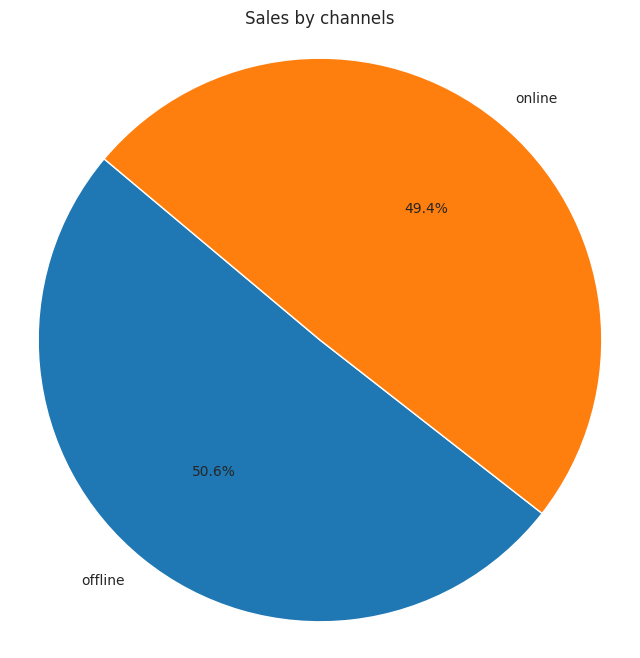

In [ ]:
# Sales by channels
sales = merged_df.groupby("Sales Channel")["Units Sold"].sum()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales by channels')
plt.axis('equal')
plt.show()

### Прибуток за каналами (онлайн/офлайн)

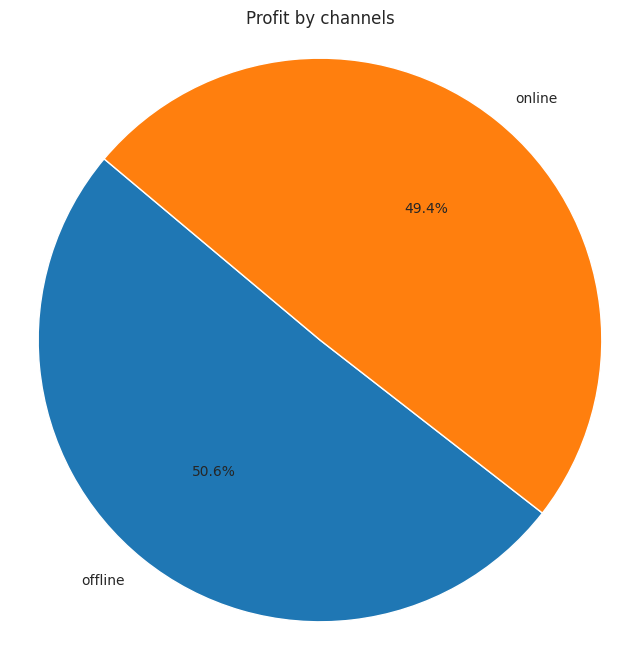

In [ ]:
# Profit by channels
sales = merged_df.groupby("Sales Channel")["profit"].sum()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Profit by channels')
plt.axis('equal')
plt.show()

###Динаміка прибутку впродовж років

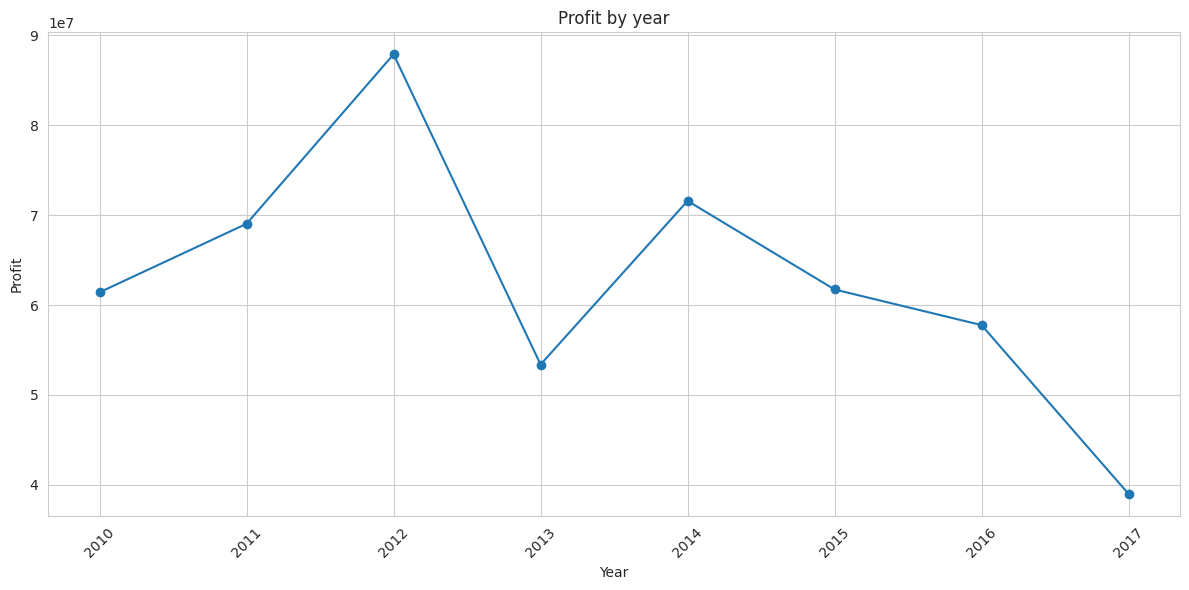

In [ ]:
# Profit by years
# Create the column with year
merged_df["Year"] = merged_df["Order Date"].dt.year

# Profit is grouped by year
yearly_profit = merged_df.groupby("Year")["profit"].sum().sort_index()

plt.figure(figsize=(12, 6))
yearly_profit.plot(marker='o')

plt.title("Profit by year")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Частка загального прибутку по рокам

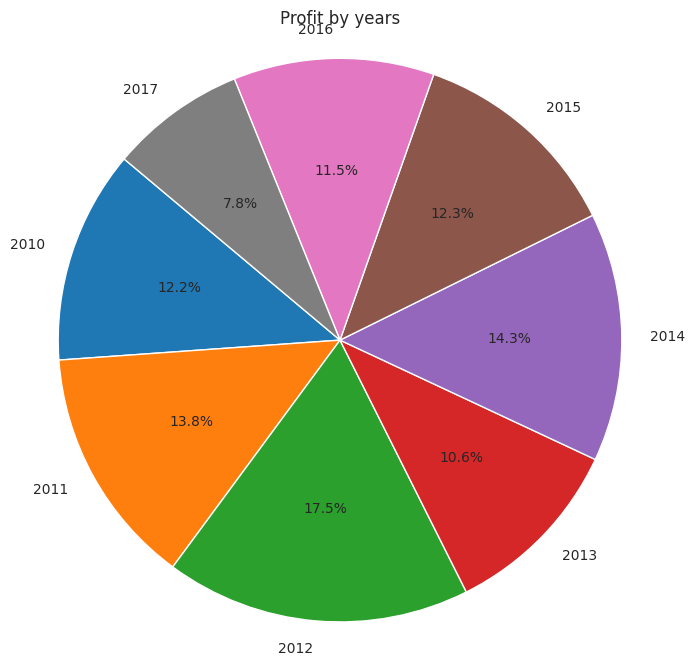

In [ ]:
# Profit by years
merged_df["Year"] = merged_df["Order Date"].dt.year
sales = merged_df.groupby("Year")["profit"].sum()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Profit by years')
plt.axis('equal')
plt.show()

###Динаміка прибутку по місяцям

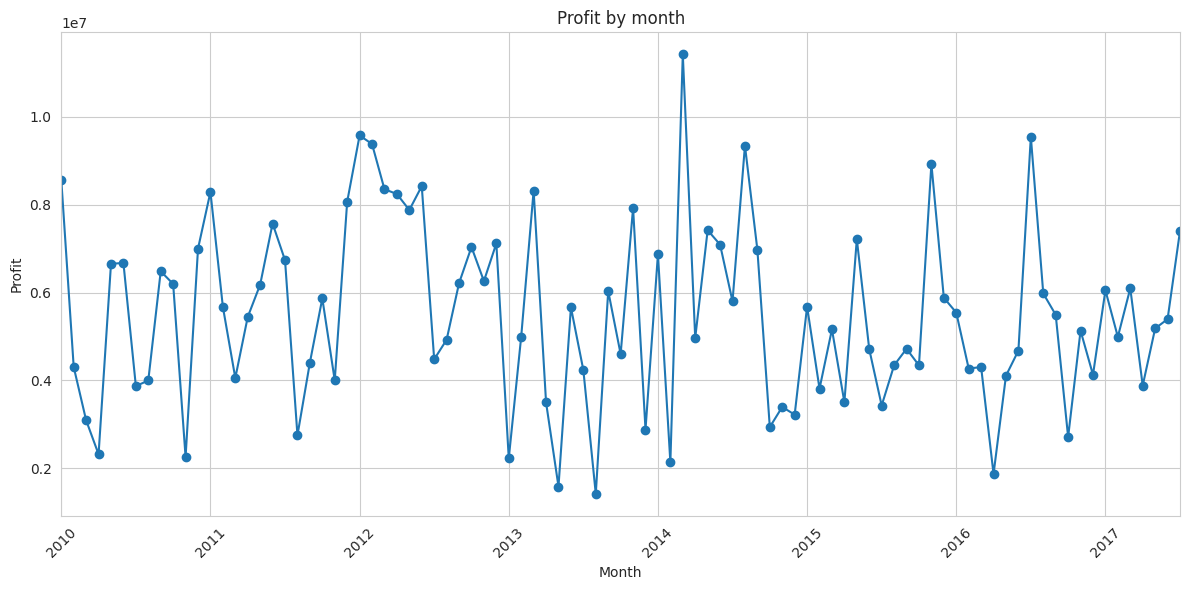

In [ ]:
# Profit by months
# Create the column with month
merged_df["Month"] = merged_df["Order Date"].dt.to_period("M")

# Profit is grouped by year
monthly_profit = merged_df.groupby("Month")["profit"].sum().sort_index()

plt.figure(figsize=(12, 6))
monthly_profit.plot(marker='o')
plt.title("Profit by month")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Продажі категорій товарів по країнам.

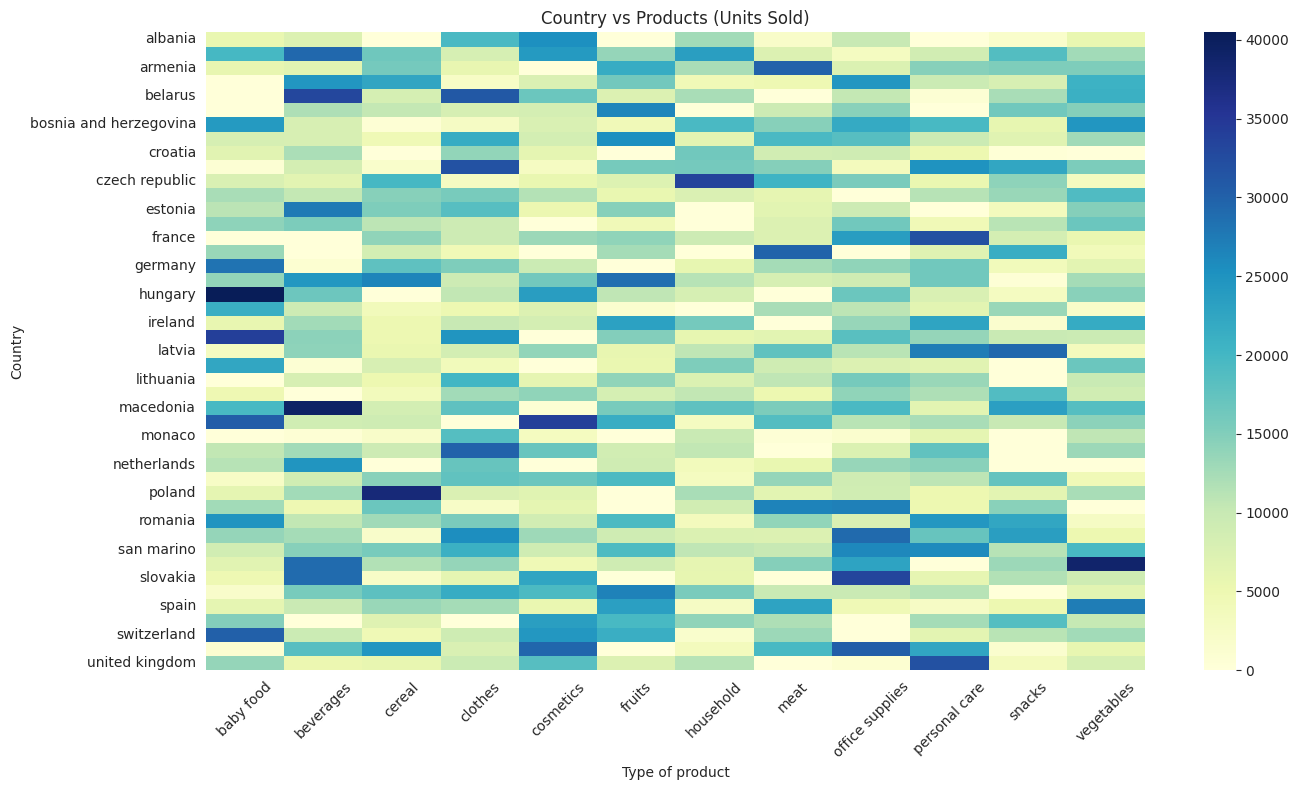

In [ ]:
# Country vs Item_type

pivot = merged_df.pivot_table(index='name', columns='item_type', values='Units Sold', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title('Country vs Products (Units Sold)')
plt.ylabel('Country')
plt.xlabel('Type of product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Прибуток категорій товарів по країнам

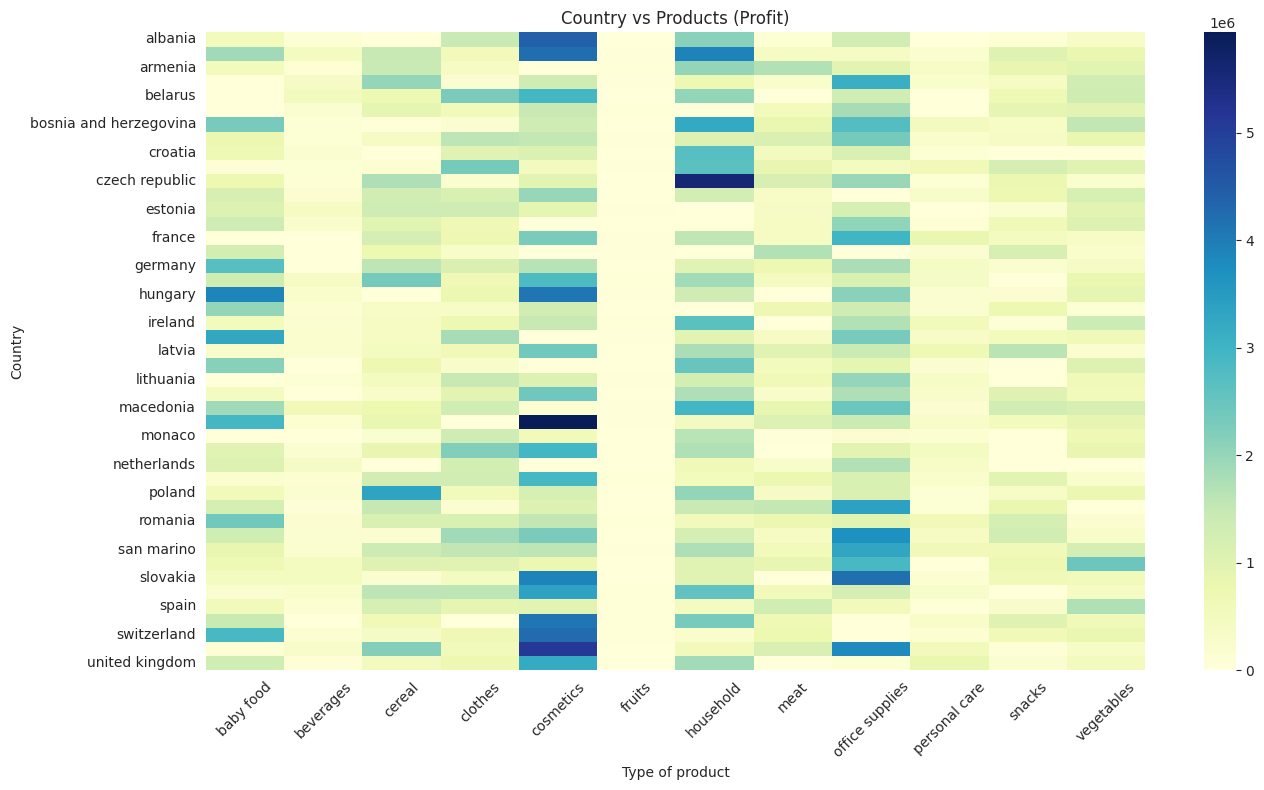

In [ ]:
# Countries vs Item_type by profit

pivot = merged_df.pivot_table(index='name', columns='item_type', values='profit', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title('Country vs Products (Profit)')
plt.ylabel('Country')
plt.xlabel('Type of product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Топ-10 країн за прибутком

<ipython-input-83-d4bfde444a57>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


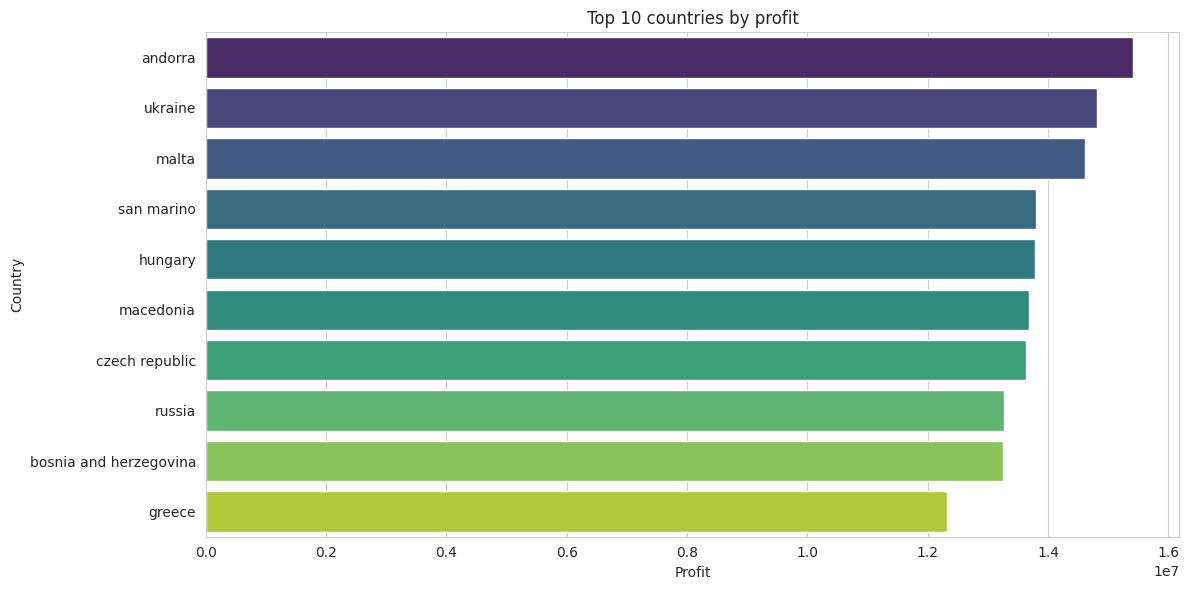

In [ ]:
# Top countries by profit.

top_countries = merged_df.groupby('name')['profit'].sum().sort_values(ascending=False).head(10)

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 countries by profit')
plt.xlabel('Profit')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


###Топ-10 країн за продажами

<ipython-input-84-d2b8d84bea4b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


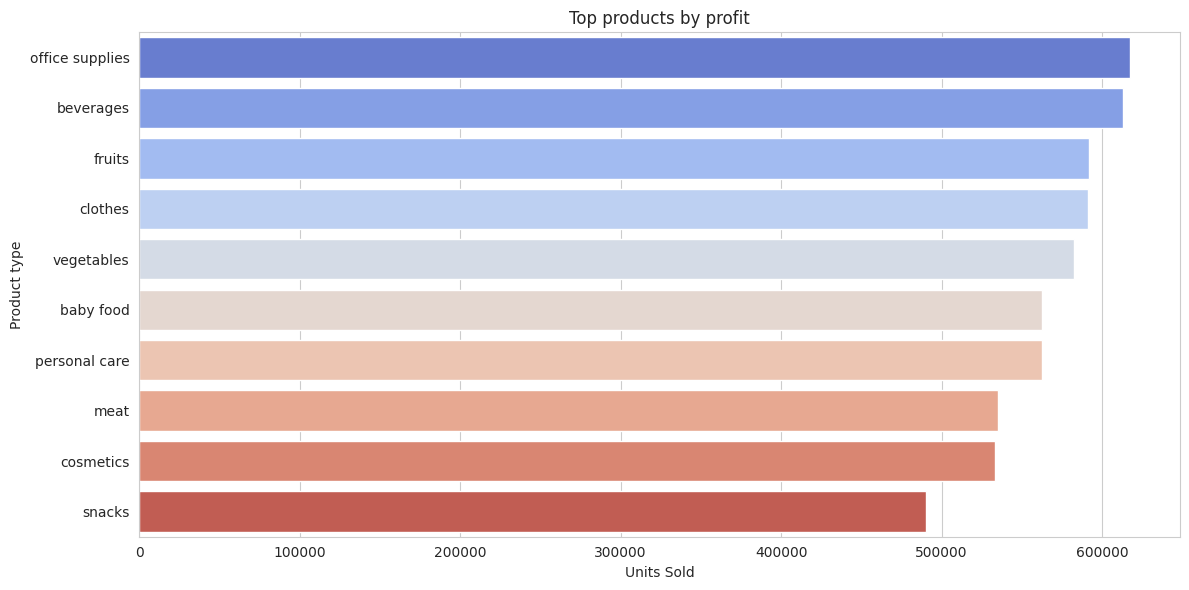

In [ ]:
# Top products by profit.

top_products = merged_df.groupby('item_type')['Units Sold'].sum().sort_values(ascending=False).head(10)

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title('Top products by profit')
plt.xlabel('Units Sold')
plt.ylabel('Product type')
plt.tight_layout()
plt.show()


1. Загальний прибуток склав $501829151.37 — найбільший внесок дали категорії Office Supplies та Beverages. Найбільш прибуткові країни - Andorra та Ukraine.
2. Продажі зростають влітку та на початку року часто, спад — восени.
3. Найефективніший канал збуту — Offline (50.6% замовлень та стільки ж прибутку). Але з каналом Online різниця невелика.
4. Різні види товарів продаються найкраще в різних країнах ( наприклад Beverages в Македонії, а Baby Food в Угорщині).
5. Додатково загальні метрики:
К-ть замовлень: 1330
Загальний дохід: 501829151.37
Охоплено країн: 46
Середня к-ть проданих одиниць: 4951.


# Аналіз продажів.

##Доходи, витрати, прибутки, популярність товарів за категоріями товарів.

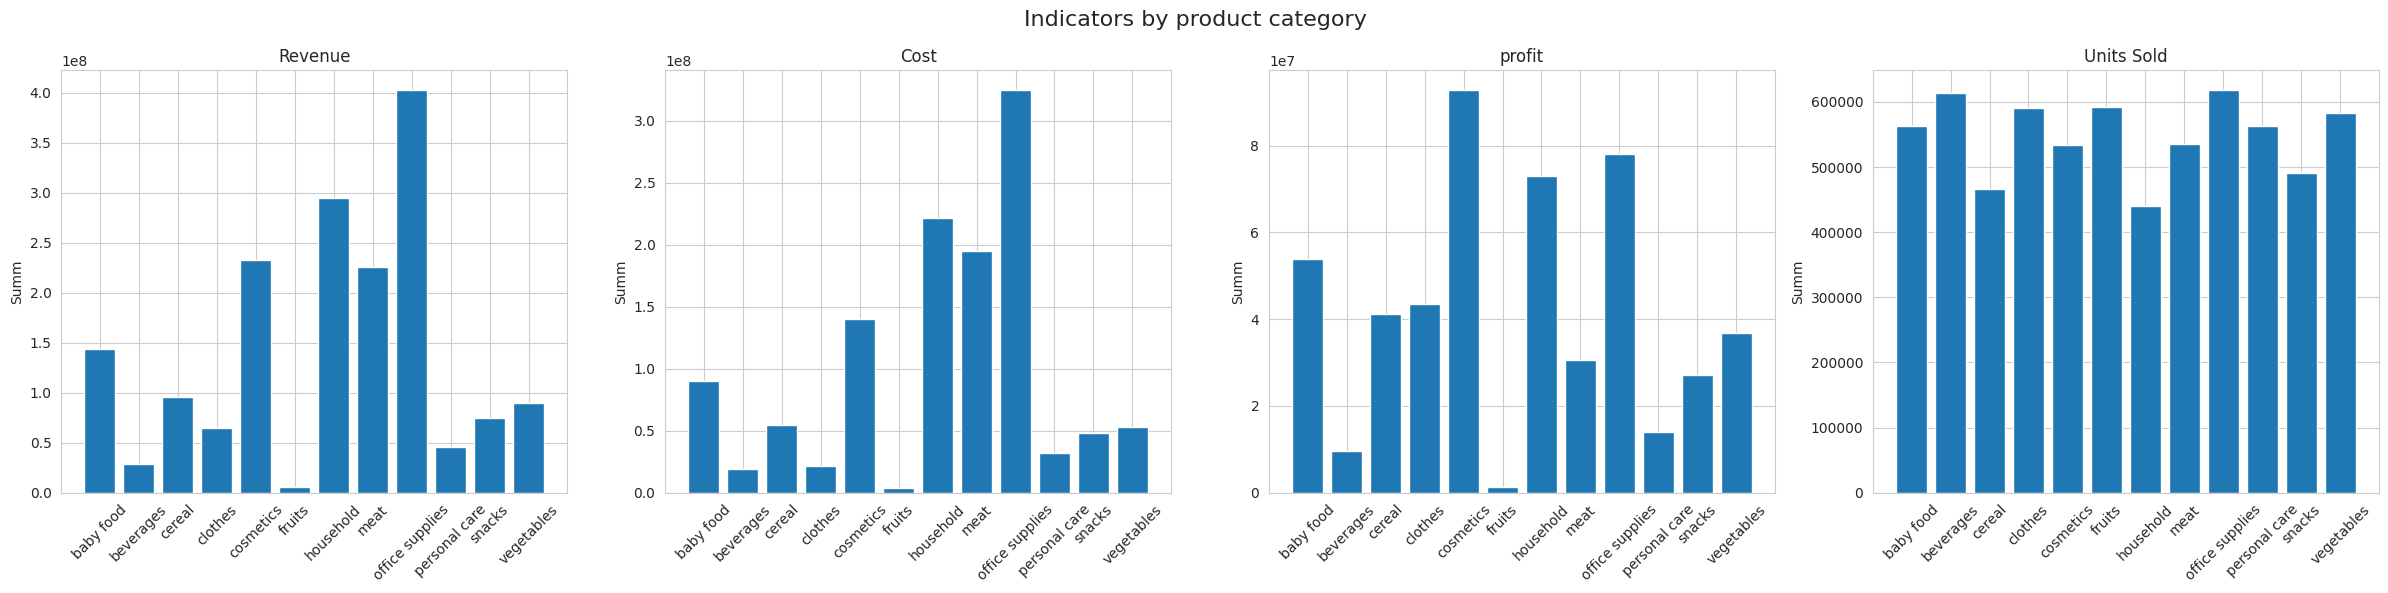

In [ ]:
# By products categories
# Group data and create columns

sns.set_style("whitegrid")

merged_df["Revenue"] = merged_df["Unit Price"] * merged_df["Units Sold"]
merged_df["Cost"] = merged_df["Unit Cost"] * merged_df["Units Sold"]

category_group = merged_df.groupby("item_type").agg({ "Revenue": "sum", "Cost": "sum", "profit": "sum", "Units Sold": "sum"})

# Building plot

fig, axs = plt.subplots(1, 4, figsize=(24, 6))
metrics = ["Revenue", "Cost", "profit", "Units Sold"]

for i, metric in enumerate(metrics):
    axs[i].bar(category_group.index, category_group[metric])
    axs[i].set_title(metric)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylabel("Summ")

fig.suptitle("Indicators by product category", fontsize=16)
plt.tight_layout()
plt.show()

За графіками видно, що найбільше доходу дають категорії office supplies (очевидний лідер), household, cosmetics.
В той самий час, найбільші витрати також йдуть на категорії office supplies (очевидний лідер), household,та meat.
В цей час найбільше доходу приносять категорії cosmetics, office supplies та household.
Найбільше продано ж було товарів у категоріях beverages, office supplies, fruits.

1. Варто сфокусуватися на таких категоріях як cosmetics та office Supplies. Вони обидві є стабільними. Можна розширювати асортимент, шукати нові ринки збуту, збільшувати рекламу.

2. Категорія Beverages має потенціал через великі продажі, тому варто проаналізувати витрати на цю категорію (можливо прибуток невеликий через складну логістику), підвищувати ціну/прибирати певні позиції.

3. Personal Care, Clothes та Baby Food - варто проаналізувати ринок, подумати над тим, як збільшити популярність (попит) цих категорій.

4. Fruits, Cereal - категорії під питанням. Варто також проаналізувати витрати  (можливо прибуток невеликий через складну логістику), проаналізувати ринок і зрозуміти чи є взагалі попит на них. Можливе об'єднання з іншими категоріями.

Додатково:

5. Household - хороший виторг, середня маржинальність. Варто підвищувати продажі (наприклад через рекламу).

6. Snacks - висока маржинальність. Варто розглянути підвищення цін, категорія має високий попит.

7. Meat - високий виторг, але низька маржинальність. Варто переглянути логістику та собівартість, оскільки м’ясо приносить великі обороти, але має низький прибуток.

8. Vegetables - низький виторг, середня маржинальність. Варто фокусуватися на збільшенні обсягів продажів – можливо, через розширення асортименту або знижки.

##Доходи, витрати, прибутки за країнами.

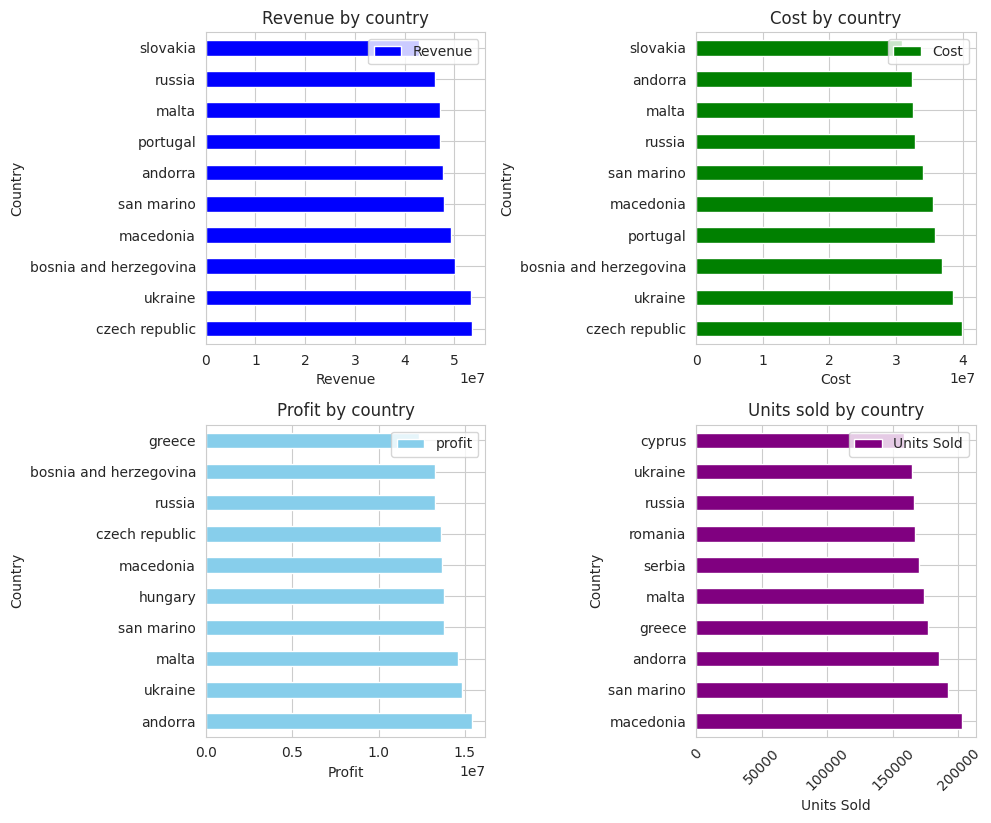

In [ ]:
# By countries
# Group data and create plots

sns.set_style("whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

country_group = merged_df.groupby("name").agg({ "Revenue": "sum"}).sort_values(by="Revenue", ascending=False).head(10).plot(kind="barh", ax=ax[0, 0], color="blue")
ax[0, 0].set_title("Revenue by country")  # Title of the subplot
ax[0, 0].set_xlabel("Revenue")  # X-axis label
ax[0, 0].set_ylabel("Country")  # Y-axis label



country_group2 = merged_df.groupby("name").agg({ "Cost": "sum"}).sort_values(by="Cost", ascending=False).head(10).plot(
    kind="barh", ax=ax[0, 1], color="green")
ax[0, 1].set_title("Cost by country")  # Title of the subplot
ax[0, 1].set_xlabel("Cost")  # X-axis label
ax[0, 1].set_ylabel("Country")  # Y-axis label



country_group2 = merged_df.groupby("name").agg({ "profit": "sum"}).sort_values(by="profit", ascending=False).head(10).plot(kind="barh", ax=ax[1, 0], color="skyblue")
ax[1, 0].set_title("Profit by country")  # Title of the subplot
ax[1, 0].set_xlabel("Profit")  # X-axis label
ax[1, 0].set_ylabel("Country")  # Y-axis label



country_group2 = merged_df.groupby("name").agg({ "Units Sold": "sum"}).sort_values(by="Units Sold", ascending=False).head(10).plot(kind="barh", ax=ax[1, 1], color="purple")
ax[1, 1].set_title("Units sold by country")  # Title of the subplot
ax[1, 1].set_xlabel("Units Sold")  # X-axis label
ax[1, 1].set_ylabel("Country")  # Y-axis label


# Adjust layout
plt.tight_layout()
plt.xticks(rotation=45)

# Show plots
plt.show()


В графіку оказані топ 10 країн по доходам, витратам, прибуткам та продажам. Як можна побачити, майже усюди це одні та ті самі країни, лише в різному порядку.

Наприклад, Україна приносить одна з найбільш високих як доходів так і прибутків. Але витрати також високі, в той час продажі, в порівнянні з іншими країнами менші. Це може свідчити про те, що в Україні скоріш за все продаються товари вищої ціни. Високі витрати можуть бути пов’язані з логістикою (великі відстані, митні збори), маркетингом.

В цей самий час Андорра має найбільший показник по прибуткам, одні з навищих продажів. Дохід посередній, а витрати низькі. Тут скоріш за все такі показники по прибуткам якраз через великі продажі, адже середній дохід натякає, що середня ціна товару не дуже висока.

Різні країни мають різні бізнес-моделі:

Одні дають високий прибуток за рахунок обсягу (Андорра).

Інші — через дорогі продажі з великою маржею, але при високих витратах (Україна).

Ефективність варто вимірювати не абсолютними значеннями, а відносними показниками:

Прибуток на одиницю продажу

Прибуток як відсоток від доходу

Витрати на 1 продаж

Так, кожну країну треба аналізувати окремо, з урахуванням її:

локальних умов (логістика, податки, ринок),

структури продажів (що саме продається),

цільової аудиторії.


##Доходи, витрати, прибутки, популярність товарів за регіонами.

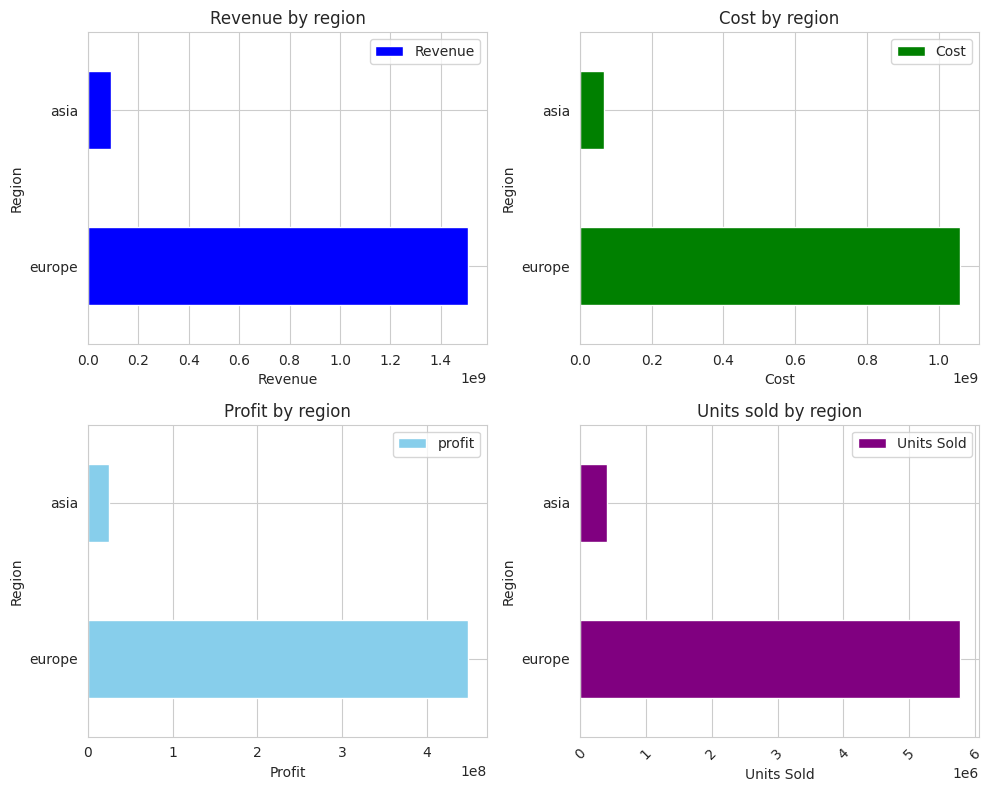

In [ ]:
# By region
# Group data and create plots

sns.set_style("whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

country_group = merged_df.groupby("region").agg({ "Revenue": "sum"}).sort_values(by="Revenue", ascending=False).head(10).plot(kind="barh", ax=ax[0, 0], color="blue")
ax[0, 0].set_title("Revenue by region")  # Title of the subplot
ax[0, 0].set_xlabel("Revenue")  # X-axis label
ax[0, 0].set_ylabel("Region")  # Y-axis label



country_group2 = merged_df.groupby("region").agg({ "Cost": "sum"}).sort_values(by="Cost", ascending=False).head(10).plot(
    kind="barh", ax=ax[0, 1], color="green")
ax[0, 1].set_title("Cost by region")  # Title of the subplot
ax[0, 1].set_xlabel("Cost")  # X-axis label
ax[0, 1].set_ylabel("Region")  # Y-axis label



country_group2 = merged_df.groupby("region").agg({ "profit": "sum"}).sort_values(by="profit", ascending=False).head(10).plot(kind="barh", ax=ax[1, 0], color="skyblue")
ax[1, 0].set_title("Profit by region")  # Title of the subplot
ax[1, 0].set_xlabel("Profit")  # X-axis label
ax[1, 0].set_ylabel("Region")  # Y-axis label



country_group2 = merged_df.groupby("region").agg({ "Units Sold": "sum"}).sort_values(by="Units Sold", ascending=False).head(10).plot(kind="barh", ax=ax[1, 1], color="purple")
ax[1, 1].set_title("Units sold by region")  # Title of the subplot
ax[1, 1].set_xlabel("Units Sold")  # X-axis label
ax[1, 1].set_ylabel("Region")  # Y-axis label


# Adjust layout
plt.tight_layout()
plt.xticks(rotation=45)

# Show plots
plt.show()

Європа очевидно лідирує по всим показникам. Можливі причини такого домінування Європи можуть бути наступними:

1. Вищий попит на товари: у Європі, можливо, більше покупців або більша купівельна спроможність.

2. Ширше охоплення ринку: більше країн, більше населення в активних регіонах продажу.

3. Дорожчі товари / більший середній чек: європейські покупці можуть купувати дорожчі товари або більшими обсягами.

4. Активніша маркетингова стратегія в Європі: можливо, фокус кампаній був саме на європейські ринки.

5. Менше обмежень або вища ефективність логістики: легша доставка, менше витрат на митницю тощо.

##Доходи, витрати, прибутки, популярність товарів за каналами (онлайн/офлайн).

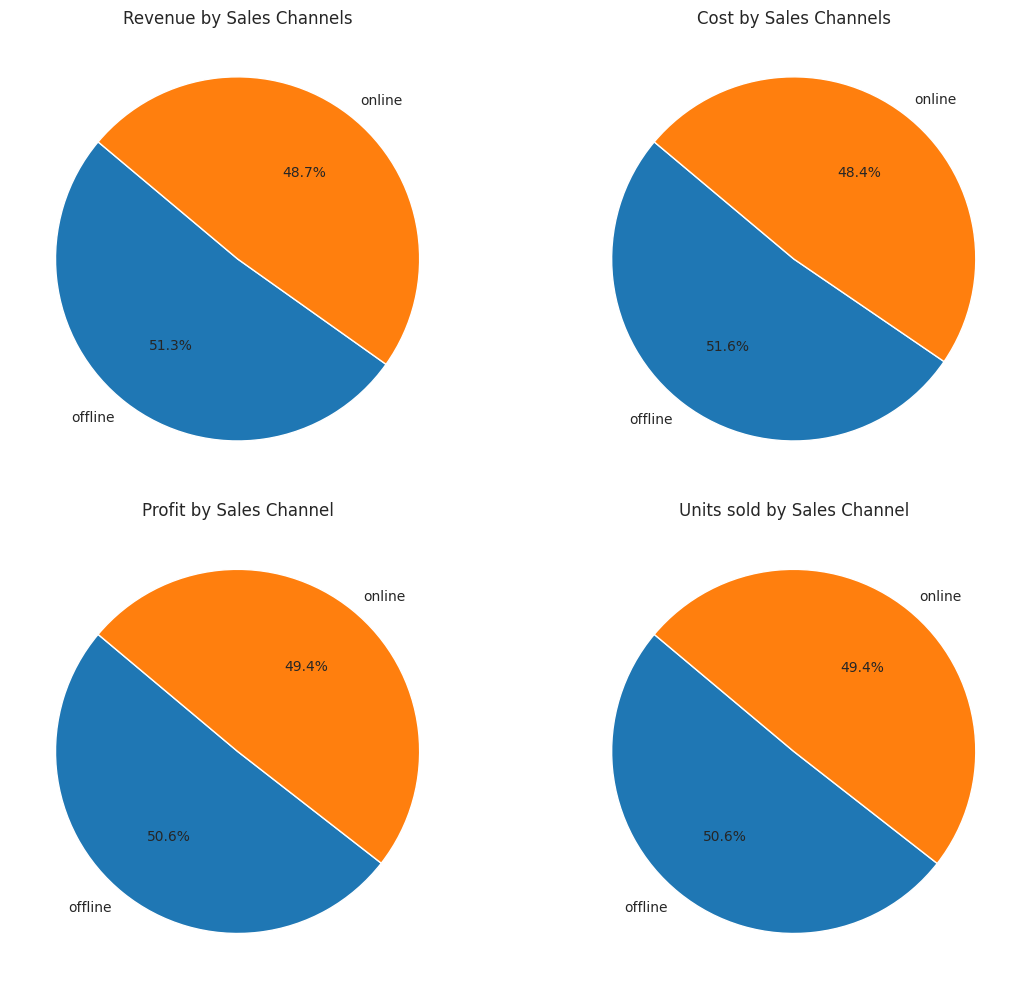

In [ ]:
# By Sales Channels
# Group data and create plots

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

channel_group = merged_df.groupby("Sales Channel")["Revenue"].sum().plot.pie(ax=ax[0, 0], autopct='%1.1f%%', startangle=140)
ax[0, 0].set_title("Revenue by Sales Channels")  # Title of the subplot
ax[0, 0].set_ylabel("")


channel_group2 = merged_df.groupby("Sales Channel")["Cost"].sum().plot.pie(ax=ax[0, 1], autopct='%1.1f%%', startangle=140)
ax[0, 1].set_title("Cost by Sales Channels")  # Title of the subplot
ax[0, 1].set_ylabel("")



channel_group2 = merged_df.groupby("Sales Channel")["profit"].sum().plot.pie(ax=ax[1, 0], autopct='%1.1f%%', startangle=140)
ax[1, 0].set_title("Profit by Sales Channel")  # Title of the subplot
ax[1, 0].set_ylabel("")



channel_group2 = merged_df.groupby("Sales Channel")["Units Sold"].sum().plot.pie(ax=ax[1, 1], autopct='%1.1f%%', startangle=140)
ax[1, 1].set_title("Units sold by Sales Channel")  # Title of the subplot
ax[1, 1].set_ylabel("")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()



За всима показниками лідирує offline канал. В продажах та прибутку на 0,6 відсотків, а в доході та витратах - 1,3 відсотки. Але ця перивага не значна. Це може свідчити про:

приблизно рівну ефективність обох каналів,

або про необхідність додаткового аналізу: можливо, онлайн має нижчі витрати на одиницю продажу, але менший загальний обсяг.



#Аналіз інтервалу часу між його замовленням та відвантаженням.

In [ ]:
# Firstly, add the day difference column between them
merged_df["Order Date"] = pd.to_datetime(merged_df["Order Date"])
merged_df["Ship Date"] = pd.to_datetime(merged_df["Ship Date"])
merged_df["ship_time"] = (merged_df["Ship Date"] - merged_df["Order Date"]).dt.days


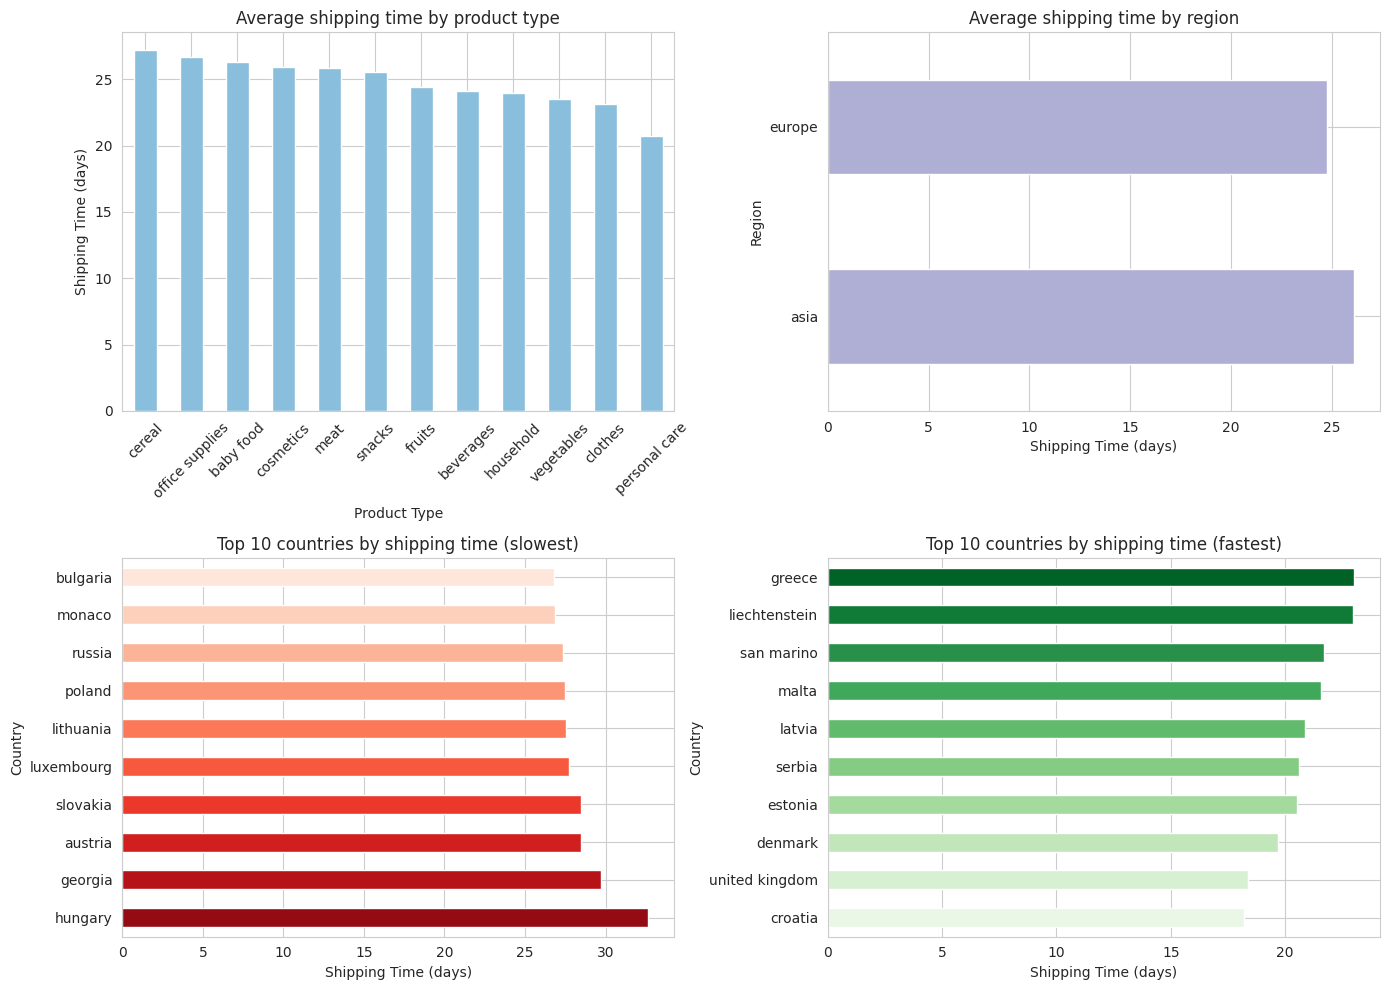

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set_style("whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# By product types
product_data = merged_df.groupby("item_type")["ship_time"].mean().sort_values(ascending=False)
product_data.plot(kind="bar", ax=ax[0, 0], color=sns.color_palette("Blues")[2])
ax[0, 0].set_title("Average shipping time by product type")
ax[0, 0].set_ylabel("Shipping Time (days)")
ax[0, 0].set_xlabel("Product Type")
ax[0, 0].tick_params(axis='x', rotation=45)

# By regions
region_data = merged_df.groupby("region")["ship_time"].mean().sort_values(ascending=False)
region_data.plot(kind="barh", ax=ax[0, 1], color=sns.color_palette("Purples")[2])
ax[0, 1].set_title("Average shipping time by region")
ax[0, 1].set_xlabel("Shipping Time (days)")
ax[0, 1].set_ylabel("Region")

# By countries (Top 10 slowest)
country_data_slowest = merged_df.groupby("name")["ship_time"].mean().sort_values(ascending=False).head(10)
colors_slowest = sns.color_palette("Reds", len(country_data_slowest))[::-1]
country_data_slowest.plot(kind="barh", ax=ax[1, 0], color=colors_slowest)
ax[1, 0].set_title("Top 10 countries by shipping time (slowest)")
ax[1, 0].set_xlabel("Shipping Time (days)")
ax[1, 0].set_ylabel("Country")

# By countries (Top 10 fastest)
country_data_fastest = merged_df.groupby("name")["ship_time"].mean().sort_values(ascending=True).head(10)
colors_fastest = sns.color_palette("Greens", len(country_data_fastest))
country_data_fastest.plot(kind="barh", ax=ax[1, 1], color=colors_fastest)
ax[1, 1].set_title("Top 10 countries by shipping time (fastest)")
ax[1, 1].set_xlabel("Shipping Time (days)")
ax[1, 1].set_ylabel("Country")

plt.tight_layout()
plt.show()


1. Продукти з найдовшим середнім часом доставки
На графіку видно, що товари типу cereal, office supplies, baby food, cosmetics мають найдовший середній час доставки — приблизно 26–28 днів.

Ці категорії можуть мати проблеми в ланцюжку постачання — варто проаналізувати постачальників, склади або митні затримки. Наприклад, продукти харчування (особливо дитяче харчування) потребують швидкої доставки.

2. Регіони з найповільнішою доставкою
Обидва регіони — Азія та Європа — мають дуже схожий середній час доставки (~25–26 днів), що свідчить про загальну стабільність у логістиці, але й водночас незадовільну швидкість.

Варто розглянути потенційну можливість оптимізації процесів доставки для підвищення конкурентоспроможності на обох ринках.

3. Країни з найповільнішою доставкою (Top 10 slowest)
Найповільніше товар надходить до таких країн як Hungary, Georgia, Austria, Slovakia — до 32 днів!

Можливо, тут потрібно залучити нових логістичних партнерів, оптимізувати маршрути або попрацювати над покращенням митного оформлення.

4. Країни з найшвидшою доставкою (Top 10 fastest)
Найшвидше товар доходить до Croatia, UK, Denmark, Estonia — ~17–20 днів. Це на 10+ днів швидше, ніж до найповільніших країн.

Є хороші логістичні потоки в цих країнах. Вони можуть бути зразком для наслідування для інших напрямків.

####Рекомендації
Оптимізувати доставку для найповільніших країн, розглянувши альтернативних перевізників або склади ближче до регіону.

Перевірити внутрішні процеси — чи є затримки на стороні складу, логістики чи документації.

Зробити пріоритетними категорії продуктів із високою цінністю або вразливістю до затримок (дитяче харчування, косметика тощо).

#Залежність прибутку від часу, необхідного на відвантаження товару.

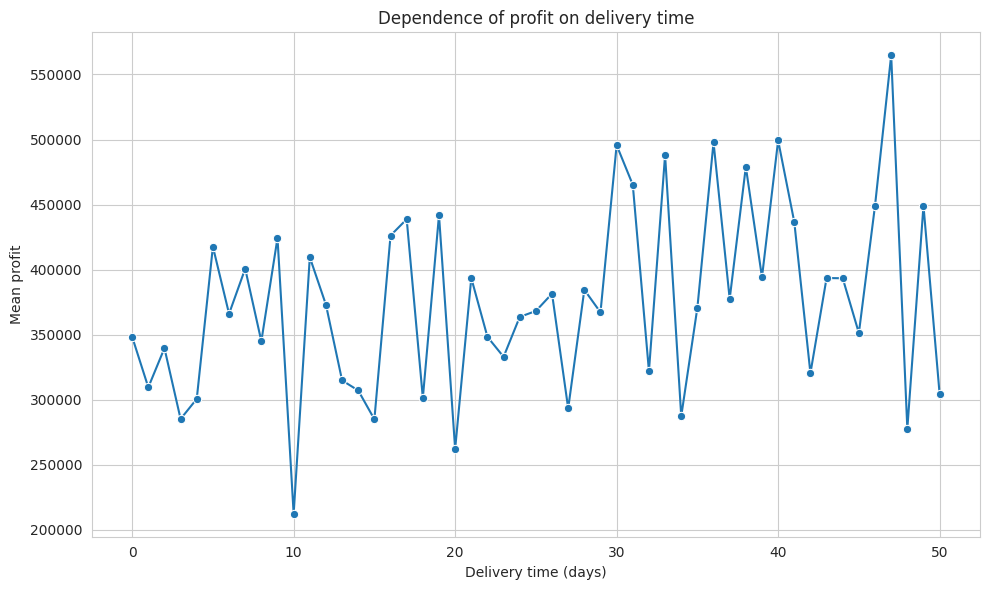

In [ ]:
delivery_profit = merged_df.groupby("ship_time")["profit"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=delivery_profit, x="ship_time", y="profit", marker="o")
plt.title("Dependence of profit on delivery time")
plt.xlabel("Delivery time (days)")
plt.ylabel("Mean profit")
plt.grid(True)
plt.tight_layout()
plt.show()



За графіком бачимо, що чіткої лінійної залежності прибутку від часу, необхідного на доставку немає. Є як високі, так і низькі значення прибутку.

Велика варіативність прибутку для всіх значень доставки свідчить про те, що інші фактори (категорія, країна, кількість проданих одиниць) мають сильніший вплив на прибуток, ніж сама кількість днів доставки.

Піки прибутку на кількостях днів доставки можуть свідчити, що в цей діапазон часто потрапляють дорогі замовлення або популярні товари.

#Динаміка продажів (у часі) у розрізі категорій товарів, країн, регіонів. Основні тенденції.

##Категорій товарів.

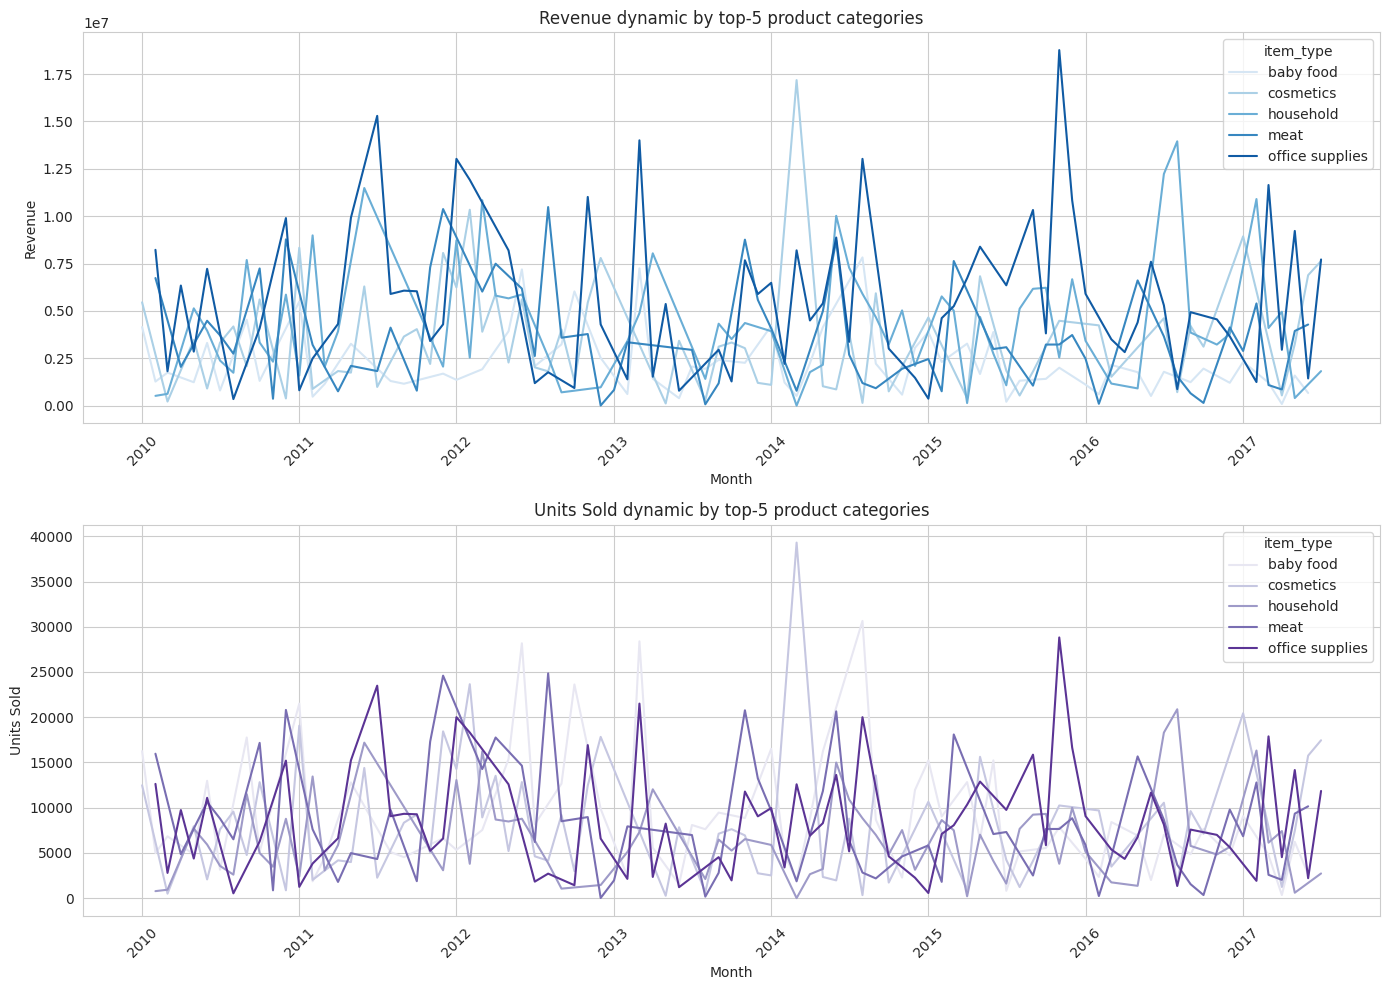

In [ ]:

# Product categories

merged_df["month"] = merged_df["Order Date"].dt.to_period("M").dt.to_timestamp()

# Top-5 categories
top_categories = merged_df.groupby("item_type")["Revenue"].sum().nlargest(5).index
filtered_df = merged_df[merged_df["item_type"].isin(top_categories)]

# Plots
sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Revenue
category_revenue = filtered_df.groupby(["month", "item_type"])["Revenue"].sum().reset_index()
sns.lineplot(data=category_revenue, x="month", y="Revenue", hue="item_type", ax=ax[0], palette="Blues")
ax[0].set_title("Revenue dynamic by top-5 product categories")
ax[0].set_ylabel("Revenue")
ax[0].set_xlabel("Month")
ax[0].tick_params(axis='x', rotation=45)

# Units Sold
category_units = filtered_df.groupby(["month", "item_type"])["Units Sold"].sum().reset_index()
sns.lineplot(data=category_units, x="month", y="Units Sold", hue="item_type", ax=ax[1], palette="Purples")
ax[1].set_title("Units Sold dynamic by top-5 product categories")
ax[1].set_ylabel("Units Sold")
ax[1].set_xlabel("Month")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


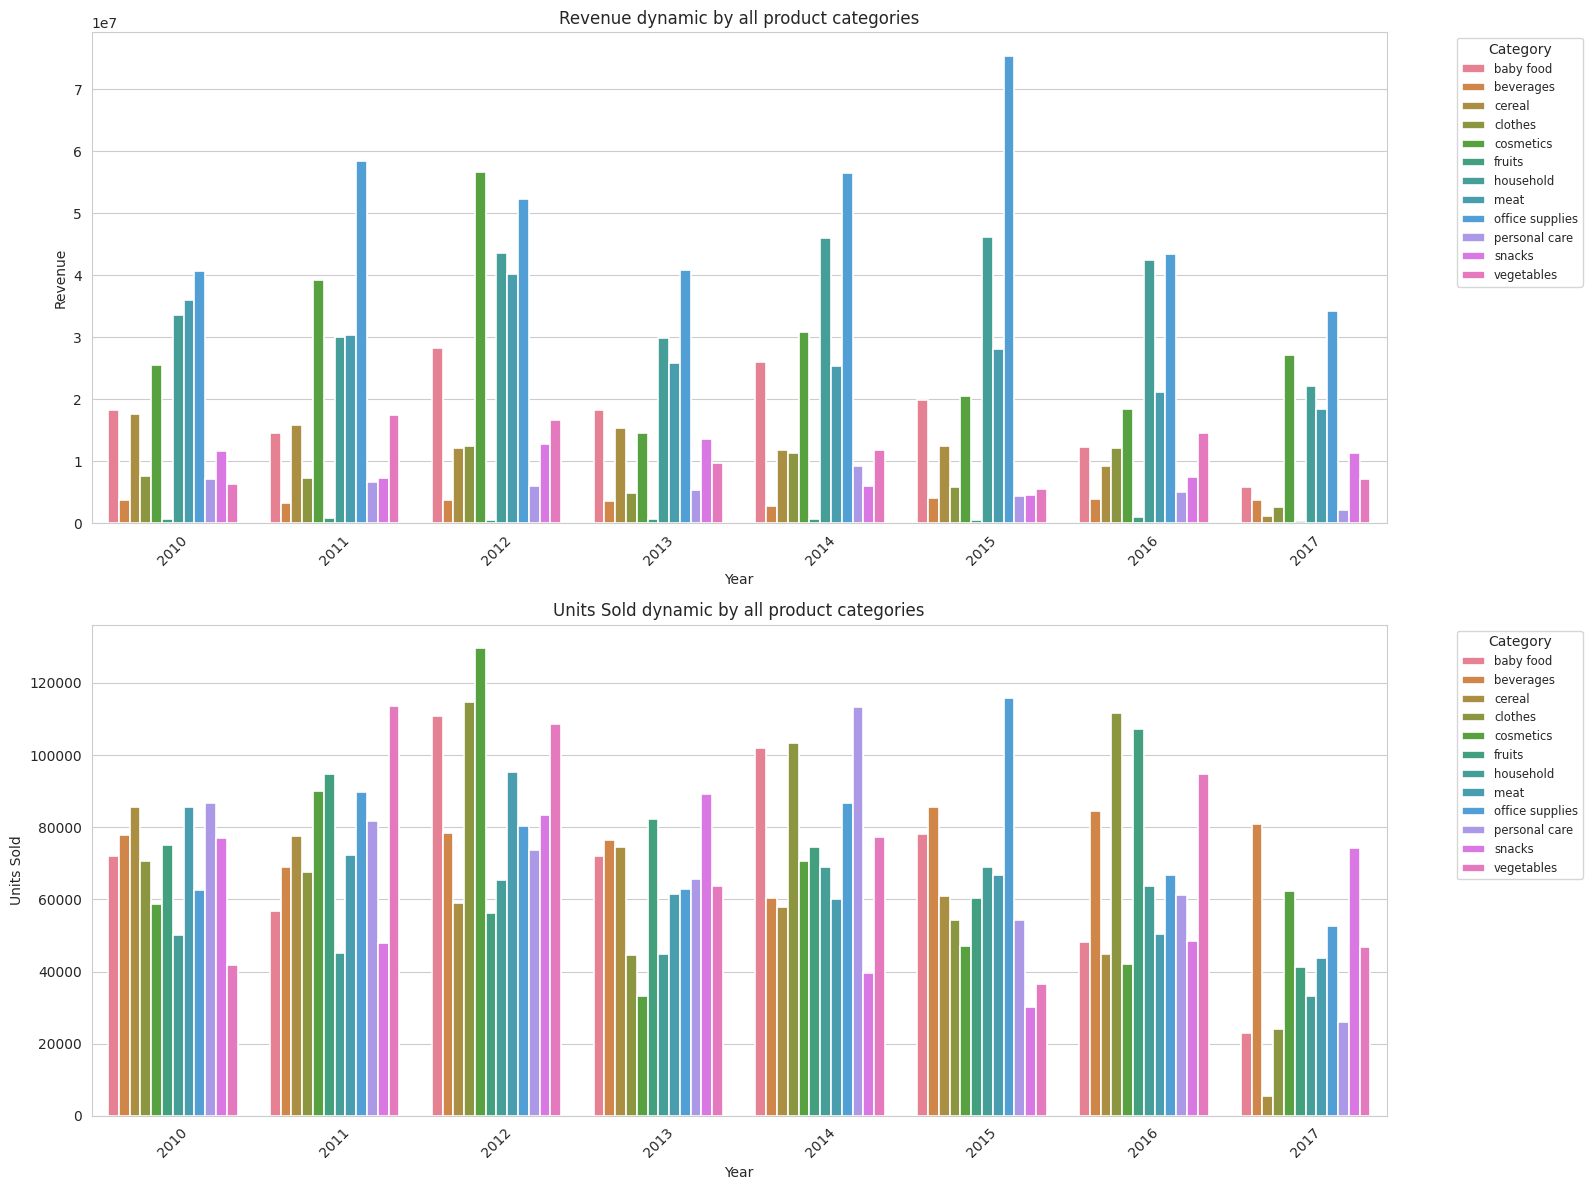

In [ ]:

merged_df["Year"] = merged_df["Order Date"].dt.year
category_revenue = merged_df.groupby(["Year", "item_type"])["Revenue"].sum().reset_index()
category_units = merged_df.groupby(["Year", "item_type"])["Units Sold"].sum().reset_index()

# Побудова графіків
sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 1, figsize=(16, 12))

# Revenue
sns.barplot(data=category_revenue, x="Year", y="Revenue", hue="item_type", ax=ax[0], linewidth=1.2)
ax[0].set_title("Revenue dynamic by all product categories")
ax[0].set_ylabel("Revenue")
ax[0].set_xlabel("Year")
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Category')

# Units Sold
sns.barplot(data=category_units, x="Year", y="Units Sold", hue="item_type", ax=ax[1], linewidth=1.2)
ax[1].set_title("Units Sold dynamic by all product categories")
ax[1].set_ylabel("Units Sold")
ax[1].set_xlabel("Year")
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Category')

plt.tight_layout()
plt.show()


Office supplies і meat — ключові для доходу, незважаючи на середню кількість продажів. Ці категорії є найприбутковішими. Варто інвестувати в їх розвиток і маркетинг.

Baby food — приклад великого обсягу продажів з низькою монетизацією.

Cosmetics має помітні піки доходу, але менш стабільні.

Baby food та household — найнижчі показники доходу, що свідчить або про менший попит, або про низьку ціну товарів у цих категоріях.

Присутні різкі злети та падіння протягом року, що може говорити про сезонність або акційні кампанії.

Після 2014 року видно тенденцію до спаду або стабілізації виручки в усіх категоріях.

Динаміка Units Sold схожа на Revenue, але не тотожна, що показує важливість оцінки прибутку в парі з обсягами.

Fruits, Cosmetics, Baby Food — мають значні коливання між роками. Наприклад, Fruits мав пік у 2012 (~55 млн), але в наступні роки просів. Є потенціал для стабілізації цих категорій — можливо, за рахунок більш точного прогнозування попиту або кращого планування логістики.

Personal Care, Beverages, Cereal, Vegetables — постійно приносять <10 млн, іноді навіть <5 млн.
Необхідна оцінка доцільності утримання цих ліній продуктів. Можливо, потрібне ребрендингування або зміна цільового ринку.



##Країн.

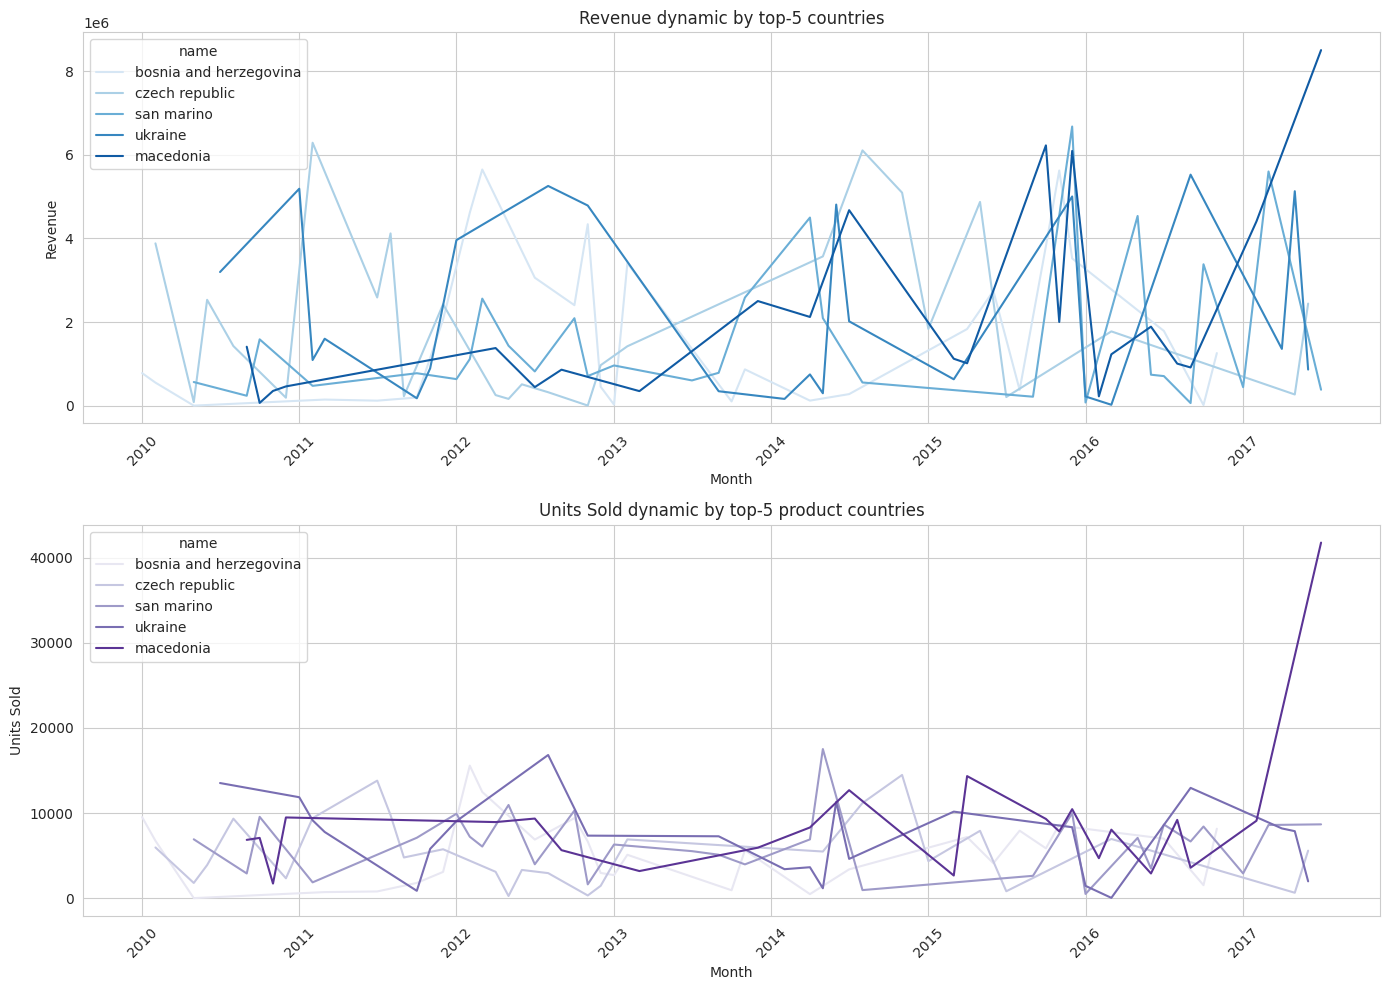

In [ ]:

# Countries

# Top-5 countries
top_categories = merged_df.groupby("name")["Revenue"].sum().nlargest(5).index
filtered_df = merged_df[merged_df["name"].isin(top_categories)]

# Plots
sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Revenue
category_revenue = filtered_df.groupby(["month", "name"])["Revenue"].sum().reset_index()
sns.lineplot(data=category_revenue, x="month", y="Revenue", hue="name", ax=ax[0], palette="Blues")
ax[0].set_title("Revenue dynamic by top-5 countries")
ax[0].set_ylabel("Revenue")
ax[0].set_xlabel("Month")
ax[0].tick_params(axis='x', rotation=45)

# Units Sold
category_units = filtered_df.groupby(["month", "name"])["Units Sold"].sum().reset_index()
sns.lineplot(data=category_units, x="month", y="Units Sold", hue="name", ax=ax[1], palette="Purples")
ax[1].set_title("Units Sold dynamic by top-5 product countries")
ax[1].set_ylabel("Units Sold")
ax[1].set_xlabel("Month")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Для графіку були взяті топ 5 країн (для не перенаватаження його + для розуміння картини по конкретній країні треба робити коремий графік для неї). Можна зробити наступні висновки:

Високий дохід не означає багато продажів. Україна тому приклад: високий дохід, але продажів небагато.

Великі обсяги продажів можуть не давати високого доходу, якщо ціни нижчі — наприклад, ситуація до 2017 року в Македонії.

Скачки в одному з показників часто сигналізують про зміни в стратегії, ринку або подіях (наприклад, економічний стимул, субсидії, кампанії, імпортні зміни тощо).

Україна - середній чек (ціна одного товару) зростає або Україна продає дорогі товари, тому прибуток вищий при менших обсягах продажів.

Македонія - значне зростання  продажів напряму призвело до росту доходів — ймовірно, відбулись великі закупівлі або масштабна кампанія.

Сан-Марино, Чехія, Боснія і Герцеговина -  у цих країнах динаміка менш передбачувана — можливі коливання цін, сезонність або зміна ринкових умов.

##Регіонів.

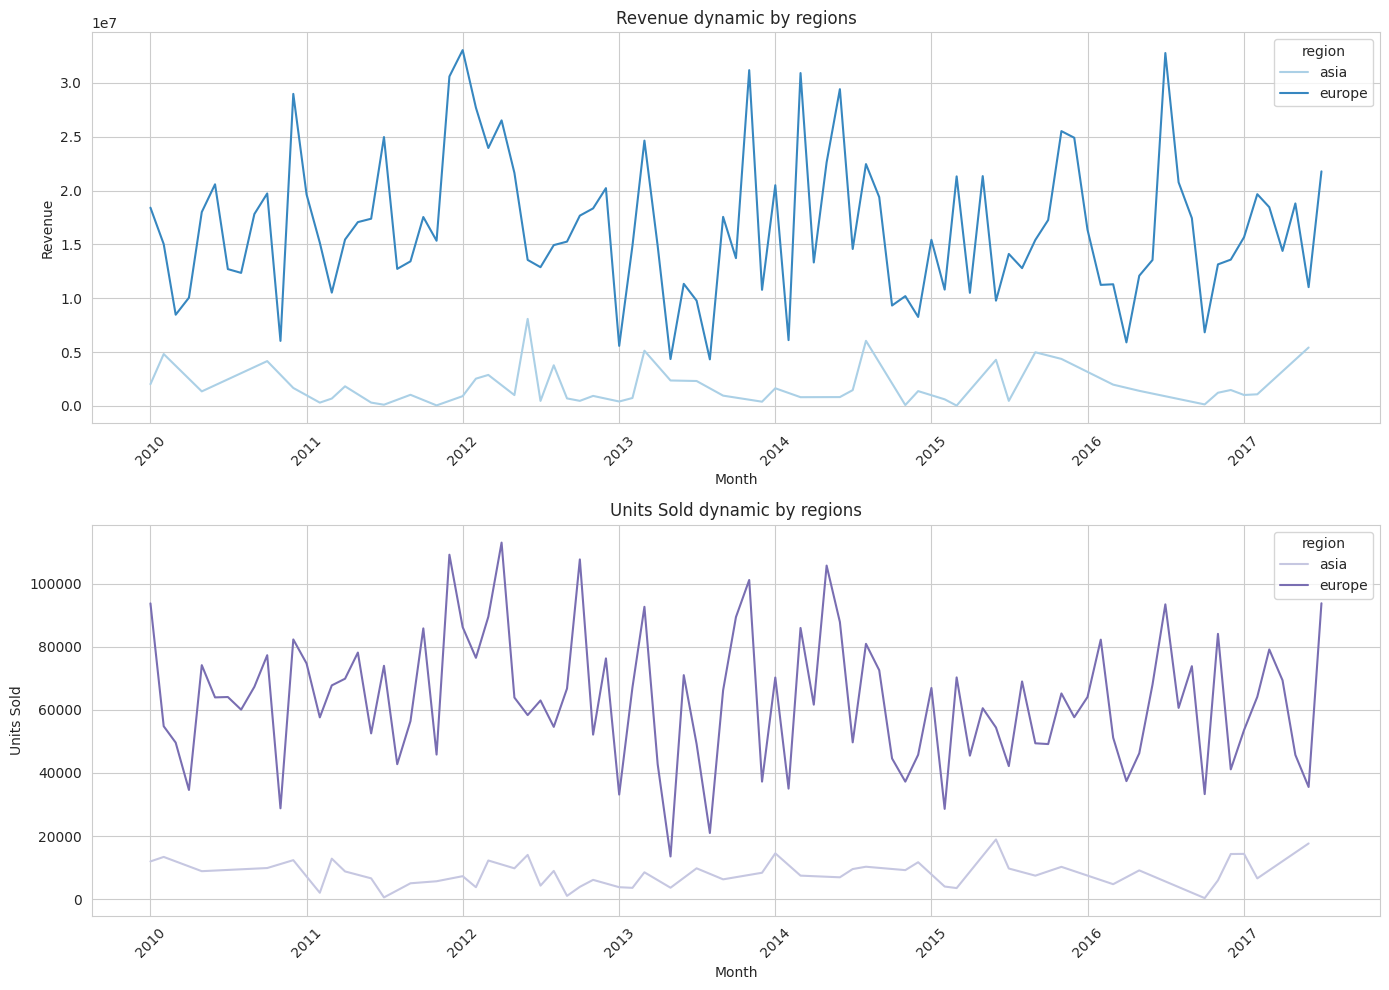

In [ ]:

# Regions

# Top-5 countries
top_categories = merged_df.groupby("region")["Revenue"].sum().nlargest(5).index
filtered_df = merged_df[merged_df["region"].isin(top_categories)]

# Plots
sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Revenue
category_revenue = filtered_df.groupby(["month", "region"])["Revenue"].sum().reset_index()
sns.lineplot(data=category_revenue, x="month", y="Revenue", hue="region", ax=ax[0], palette="Blues")
ax[0].set_title("Revenue dynamic by regions")
ax[0].set_ylabel("Revenue")
ax[0].set_xlabel("Month")
ax[0].tick_params(axis='x', rotation=45)

# Units Sold
category_units = filtered_df.groupby(["month", "region"])["Units Sold"].sum().reset_index()
sns.lineplot(data=category_units, x="month", y="Units Sold", hue="region", ax=ax[1], palette="Purples")
ax[1].set_title("Units Sold dynamic by regions")
ax[1].set_ylabel("Units Sold")
ax[1].set_xlabel("Month")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


###Аналіз доходів (Revenue):
Європа:

Генерує набагато більше доходу, ніж Азія упродовж усього періоду.
Спостерігаються піки, з найвищими значеннями в 2011–2012 та 2014–2016 роках.
Після 2014 року доходи нестабільні, з різкими підйомами та спадами, хоча загальний рівень лишається високим.

Азія:

Доходи залишаються на низькому рівні у порівнянні з Європою.
Присутні незначні піки, особливо в 2012 та 2017 роках, але загальна тенденція майже пласка.

###Аналіз одиниць продажу (Units Sold):
Європа:

Продажі значно вищі, ніж в Азії.
Спостерігається поступове зниження після 2012 року, хоч і з короткотривалими злетами.
У 2016–2017 роках є ознаки стабілізації або незначного зростання.

Азія:

Рівень продажу низький і стабільний, без значного росту або падіння.
Деякі локальні піки в 2012 і 2017 роках, але загальна картина свідчить про невеликий ринковий вплив.

###Висновки:
Європа — ключовий ринок:

Високий рівень доходу та продажів свідчить про велику базу клієнтів і добре налагоджені канали збуту.
Незважаючи на коливання, загальна прибутковість стабільна.
Рекомендується інвестувати в утримання частки ринку (програми лояльності, оптимізація логістики, нові продукти).

Азія — потенціал:

Поточний рівень доходів і продажів дуже низький.
Можливо, немає локалізації продукту/маркетингу, або є логістичні бар'єри.
Рекомендовано дослідження ринку та пілотні проєкти: нові дистриб’ютори, локалізовані кампанії, вивчення конкурентів.


Зменшення одиниць продажів у Європі після 2012 року може свідчити про насичення ринку або конкуренцію.

Слід переглянути цінову політику, маркетингові стратегії, або ввести інноваційні продукти.

#Аналіз продажів товарів за днями тижня. Чи можна деякі товари вважати сезонними?

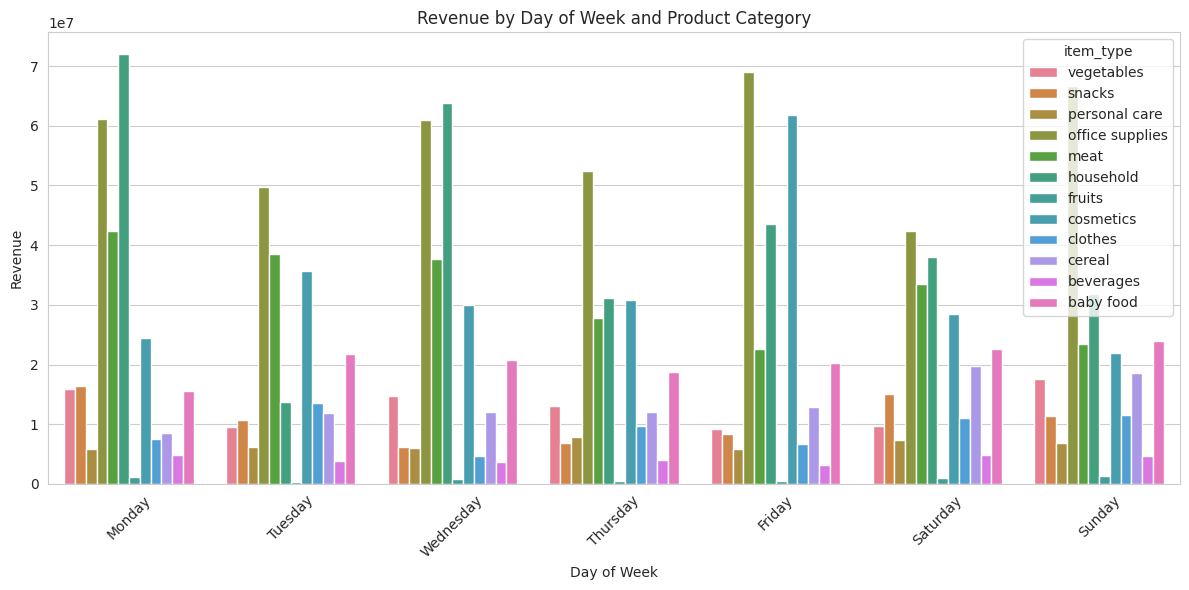

In [ ]:

merged_df["day_of_week"] = pd.to_datetime(merged_df["Order Date"]).dt.day_name()

sales = merged_df.groupby(["day_of_week", "item_type"])["Revenue"].sum().reset_index()

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales["day_of_week"] = pd.Categorical(sales["day_of_week"], categories=ordered_days, ordered=True)
sales = sales.sort_values("day_of_week")

plt.figure(figsize=(12, 6))
sns.barplot(data=sales, x="day_of_week", y="Revenue", hue="item_type")
plt.title("Revenue by Day of Week and Product Category")
plt.xlabel("Day of Week")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Можемо побачити, що для деяких категорій товару день тижня дійсно відіграє роль, а для деяких ні. Давайте проаналізуємо кожну з них:

vegetables - найвищі доходи в понеділок, середу, четвер, неділю.

snacks - найвищі доходи в понеділок, вівторок, суботу, неділю.

personal care - має приблизно однакові доходи в усі дні тижня, з невеликою різницею. Найвищі доходи в четвер, суботу, неділю.

office supplies - найвищі доходи в понеділок, середу, п'ятницю(помітно виділяється), неділю.

meat - найвищі доходи в понеділок, після чого до п'ятниці включно доходи спадають, і в суботу знову зростають (але все ще нижчі за результати в понеділок).

household - найвищі доходи в понеділок. Далі різкий спад у вівторок, та знову доволі високі показники у середу.Знову спад у четвер, та підняття в п'ятницю. Показники на вихідних однакові і нижчі за п'ятницю.

fruits - найвищі доходи в неділю та понеділок. Але варто зазначити, що в загальному ця категорія має найнижчі продажі.

cosmetics - найвищі доходи у вівторок та п'ятницю (п'ятниця перевищує вівторок помітно).

clothes - найвищі доходи у вівторок, суботу та неділю.

cereal - найвищі доходи в суботу та неділю. В інші дні тижні показники майже однакові (нижчі за вихдні, але не кардинально). Понеділок же має найнижчі.

beverages - найвищі доходи в суботу, неділю та понеділок. Але в порівнянні з іншими днями різниця не кардинально більша.

baby food - найвищі доходи в неділю. Також, високі показники мають суботу, вівторок та середа.

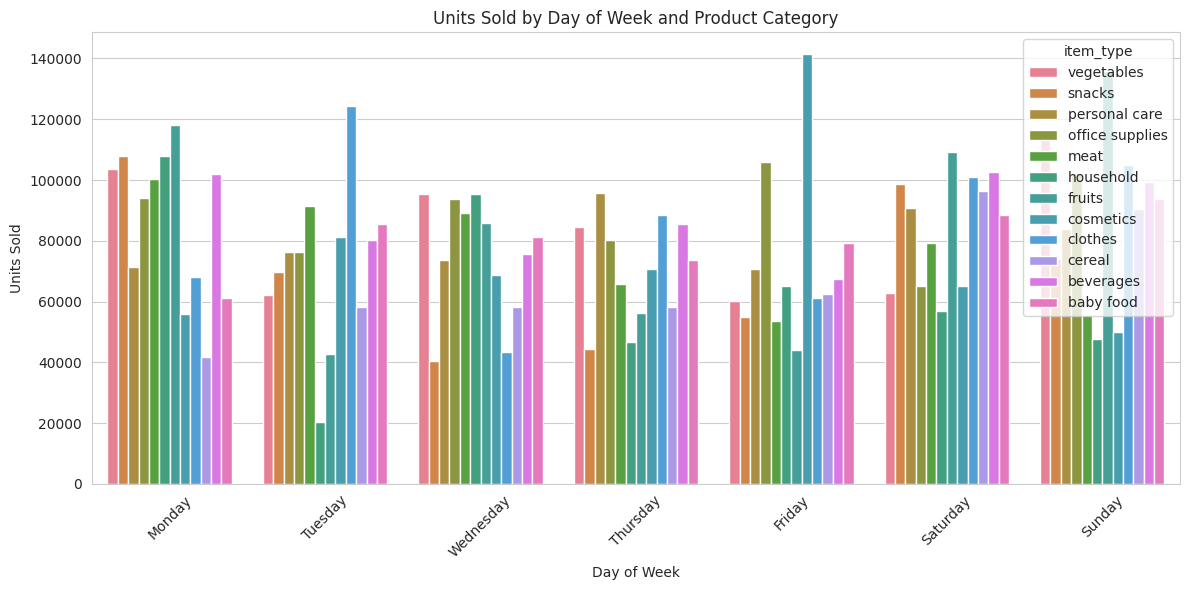

In [ ]:

sales = merged_df.groupby(["day_of_week", "item_type"])["Units Sold"].sum().reset_index()

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales["day_of_week"] = pd.Categorical(sales["day_of_week"], categories=ordered_days, ordered=True)
sales = sales.sort_values("day_of_week")

plt.figure(figsize=(12, 6))
sns.barplot(data=sales, x="day_of_week", y="Units Sold", hue="item_type")
plt.title("Units Sold by Day of Week and Product Category")
plt.xlabel("Day of Week")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

По продажам результати наступні:

vegetables - найвищі результати у понеділок, середу та неділю.

snacks - найвищі результати у понеділок та суботу. Значне зниження присутнє в середу та четвер.

personal care - найвищі результати у четвер, суботу та неділю.

office supplies - найвищі результати у понеділок, середу, п'ятницю та неділю.

meat - найвищі результати у понеділок, далі маємо поступовий спад і знову трохи вищі показники у суботу.

household - найвищі результати у понеділок та середу.

fruits - найвищі результати у неділю (майже в два рази більші ніж в інші дні) та понеділок.

cosmetics - найвищі результати у п'ятницю (майже в два рази більші ніж в інші дні).

clothes - найвищі результати у вівторок та на вихідних.

cereal - найвищі результати на вихідних. Понеділок - найнижчі, в інші дні приблизно однакові результати з невеликою різницею.

beverages - найвищі результати у понеділок, суботу та неділю.

baby food - найвищі результати у суботу та неділю. В інші дні (окрім понеділка) мають невеликі коливання.

##Порівнюючи результати по доходу та по продажам
для кожної категорії, можна зробити такі узагальнення та надати відповідні рекомендації:

###Vegetables
Продажі та дохід найвищі в понеділок, середу та неділю. Це свідчить про стабільний попит на свіжі овочі на початку та в кінці тижня.
Рекомендація: Проводити промо-акції або поповнювати запаси саме до понеділка і вихідних.

###Snacks
Дохід та продажі найвищі в понеділок і суботу, що вказує на активні закупки на початку тижня та перед вихідними.
Рекомендація: Варто акцентувати маркетинг на ці дні, особливо на п'ятницю-суботу, щоб покращити середу та четвер.

###Personal care
Дохід і продажі збігаються: стабільно хороші показники в четвер, суботу та неділю.
Рекомендація: Розміщувати спецпропозиції на ці дні, можливо, робити "beauty weekend".

###Office supplies
Понеділок, середа, п’ятниця — ключові дні як для доходу, так і для продажу. Це типово для B2B-категорій.
Рекомендація: Сфокусувати рекламу на будні, особливо на п’ятницю — можливо, компанії поповнюють запаси перед новим тижнем.

###Meat
Дохід і продажі найвищі в понеділок, спад у будні, невелике зростання в суботу.
Рекомендація: Варто стимулювати попит у середині тижня, наприклад, через знижки у середу-четвер.

###Household
Дохід і продажі збігаються — найкращі показники у понеділок і середу.
Рекомендація: В ці дні підкреслювати товари для прибирання/прання у рекламі, наприклад, як підготовку до нового тижня.

###Fruits
Найнижчий дохід серед усіх категорій, але продажі зростають у неділю майже вдвічі. Це свідчить про низький середній чек.
Рекомендація: Спробувати збільшити середній чек за рахунок крос-продажів (набори, акції "2+1").

###Cosmetics
Дохід і продажі пікові у п’ятницю. Це може бути пов’язано з підготовкою до вихідних.
Рекомендація: Зробити п’ятницю "beauty day" з бонусами або подарунками.

###Clothes
Високі показники у вівторок та вихідні як за доходом, так і за кількістю.
Рекомендація: Стимулювати онлайн-активність на вихідних і розпродажі у вівторок.

###Cereal
Найвищий дохід і продажі у вихідні, найнижчі в понеділок.
Рекомендація: Можна запускати акції на понеділок (наприклад, "здоровий старт тижня") для підвищення попиту.

###Beverages
Дохід і продажі найвищі в суботу, неділю та понеділок. Різниця не критична, але тренд простежується.
Рекомендація: Пропонувати комбо-набори на вихідні та фокус на доставку у понеділок (офіси, домівки).

###Baby food
Найвищі продажі та дохід у вихідні, особливо в неділю.
Рекомендація: Батьки купують продукти на тиждень саме у вихідні — хороша нагода пропонувати пакети або акції “вихідного дня”.

##Загальний висновок:
У більшості категорій дохід і кількість продажів узгоджуються між собою, але є винятки, наприклад fruits — висока кількість продажів, але низький дохід. Це сигнал на перегляд цінової політики чи формування наборів. У категоріях типу cosmetics, clothes, baby food яскраво простежуються споживчі звички, тож рекламні кампанії та пропозиції варто планувати на пікові дні. Для meat, household, office supplies — найкраще працюють будні, що варто враховувати при плануванні закупівель і запасів.

#Аналіз продажів товарів за сезонністю

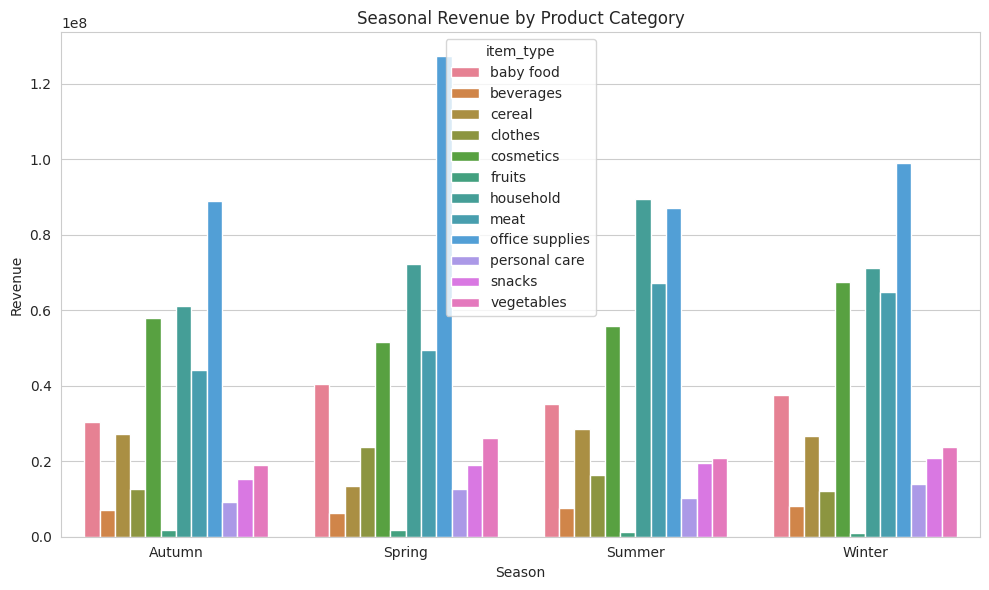

In [ ]:
merged_df["month"] = merged_df["Order Date"].dt.month
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

merged_df["season"] = merged_df["month"].apply(get_season)

seasonal_sales = merged_df.groupby(["season", "item_type"])["Revenue"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_sales, x="season", y="Revenue", hue="item_type")
plt.title("Seasonal Revenue by Product Category")
plt.xlabel("Season")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


За графіком:

vegetables - найбільший дохід дають навесні та взимку (але менший ніж навесні).

snacks - дохід дають майже однаковий в усі пори року, взимку трохи вищий.

personal care - найбільший дохід дає навесні та взимку. Але різниця з іншими сезонами невелика.

office supplies - найбільший дохід дають навесні. Зима також має гарні результати, інші пори року трохи нижчі.

meat - найбільший дохід дає влітку та взимку.

household - найбільший дохід дає навесні та влітку, в інші сезони трохи нижчі.

fruits - найбільший дохід дають навесні та восени. Але в загальному доходи дуже низькі.

cosmetics - найбільший дохід дає взимку.

clothes - найбільший дохід дають навесні.

cereal - найбільший дохід дає влітку. Але в загальному результати мають невелику різницю по порам року.

beverages - найбільший дохід дають влітку та взимку. Але в загальному результати мають невелику різницю по порам року.

baby food - найбільший дохід дає навесні, найнижчі - восени.

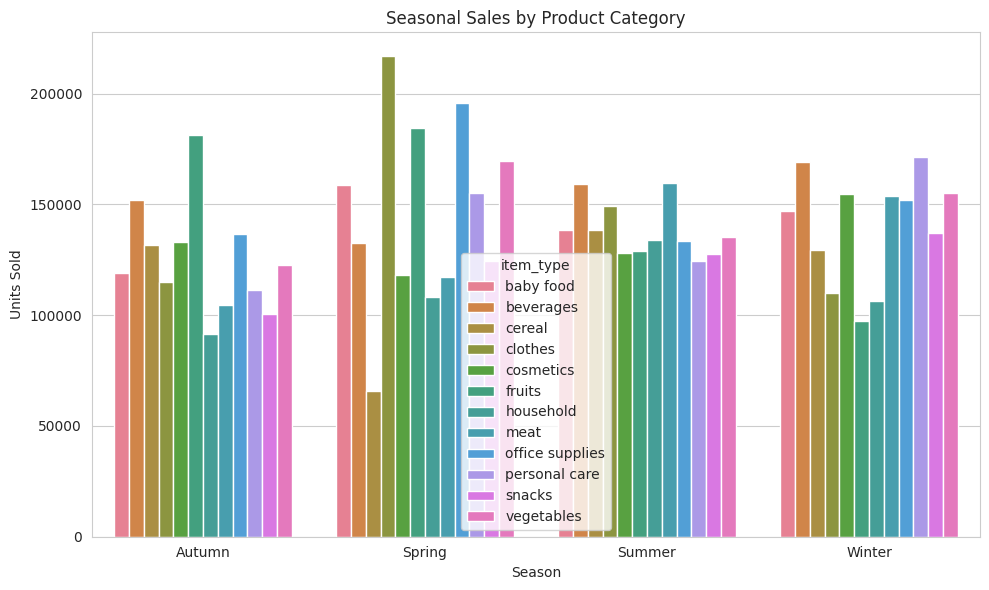

In [ ]:

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

merged_df["season"] = merged_df["month"].apply(get_season)

seasonal_sales = merged_df.groupby(["season", "item_type"])["Units Sold"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_sales, x="season", y="Units Sold", hue="item_type")
plt.title("Seasonal Sales by Product Category")
plt.xlabel("Season")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

За графіком:

vegetables - найбільші продажі навесні, та взимку. Найнижчі - восени.

snacks - найбільші продажі влітку та взимку.

personal care - найбільші продажі взимку та навесні.

office supplies - найбільші продажі навесні, найнижчі - влітку.

meat - найбільші продажі влітку та взимку.

household - найбільші продажі влітку, найнижчі - восени.

fruits - найбільші продажі навесні та восени.

cosmetics - найбільші продажі помітно взимку, найнижчі - навесні.

clothes - найбільші продажі навесні, також влітку вищі від зими та осені результати.

cereal - в загальному протягом всих пір року приблизно однакові продажі, але спостерігається зменшення попиту навесні.

beverages - найбільші продажі взимку, та непогані влітку.

baby food - найбільші продажі навесні, та трохи менше взимку.

##Аналіз сезонності продажів та доходу по категоріях товарів
 свідчить про наявність певних тенденцій у споживчій поведінці протягом року. Загалом, спостерігається кореляція між обсягами продажів та доходом, однак у деяких категоріях є відмінності, які варто враховувати при плануванні бізнес-активностей.

###Vegetables
мають найвищий дохід та продажі навесні, з гарними показниками взимку. Це може бути пов’язано з попитом на свіжу продукцію у весняний період, коли покупці відновлюють раціон після зими. Рекомендація: посилити маркетинг у весняний сезон, а взимку підтримувати запаси та акції.

###Snacks
показують стабільні результати у всіх сезонах, з трохи вищим доходом взимку. Можливо, це пов’язано з частішими перекусами в холодний період. Рекомендація: зберігати рівномірну дистрибуцію протягом року з фокусом на зимові промо.

###Personal care
стабільні, але трохи кращі навесні та взимку. Це може бути пов’язано з оновленням особистих запасів або сезонними змінами догляду. Рекомендація: активізувати комунікації в ці періоди, особливо в зимовий сезон.

###Office supplies
має яскраво виражений пік навесні, що може бути пов’язано з діловою активністю, початком навчального семестру або новим фінансовим роком. Рекомендація: зосередити запаси та рекламну активність на весну.

###Meat
популярне влітку (можливо, через сезон барбекю) та взимку. Рекомендація: запланувати акції на літні місяці та зимові свята.

###Household
мають високі доходи і продажі влітку та весною. Це може бути пов’язано з сезонним прибиранням, оновленням дому. Рекомендація: влітку посилити просування на тему затишку та ремонту.

###Fruits
 хоча й мають загалом невеликі доходи, продаються краще навесні та восени — можливо, через наявність сезонної продукції. Рекомендація: робити акцент на свіжість і локальність у ці сезони.

###Cosmetics
має значний пік взимку, що може бути пов’язано з подарунками на свята або доглядом у холодний період. Рекомендація: розробити святкові набори та зимові рекламні кампанії.

###Clothes
найкраще продається та дає дохід навесні. Ймовірно, це пов’язано з оновленням гардеробу після зими. Рекомендація: запускати нові колекції в цей період.

###Cereal
мають стабільний попит з легким зростанням влітку по доходу, хоча продажі навесні трохи зменшуються. Це може вказувати на сезонні зміни в раціоні. Рекомендація: підтримувати постійний асортимент, без сильного сезонного фокусу.

###Beverages
мають найвищі продажі взимку та добрі результати влітку, що свідчить про два різних типи попиту: святковий і сезонний (охолоджувальні напої). Рекомендація: запускати зимові та літні лінійки.

###Baby food
має чіткий весняний пік. Це може бути пов’язано з плановим введенням прикорму або сезонною зміною в раціоні дітей. Рекомендація: фокусуватись на весняні акції та поради для батьків.

###Загальний висновок:
Весна є найсильнішим сезоном для більшості категорій, що свідчить про активізацію покупців після зими. Влітку — попит зміщується до м’яса, побуту, напоїв. Взимку спостерігається сплеск у косметиці, снеках, м’ясі. Осінь — найслабша для багатьох товарів. Бізнесу варто планувати промо-кампанії та логістику з урахуванням цих трендів, розробляти сезонні продукти та кампанії, орієнтовані на найбільш перспективні періоди.